<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

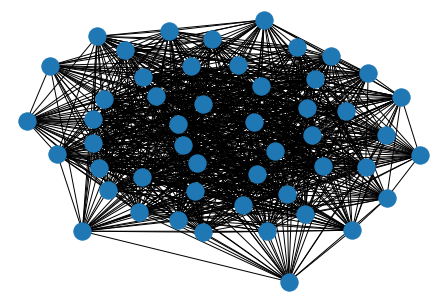

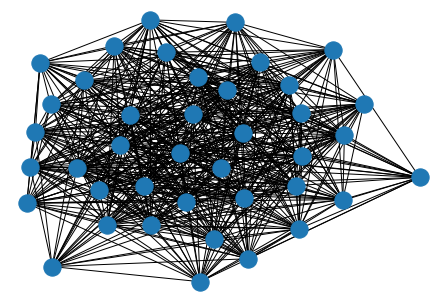

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .7 #Probabibilty for Node Connection in random graph
PP = .7
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 1 1 0]
 [0 0 1 ... 1 1 0]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]]
[[0 0 1 ... 1 1 1]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + N/5))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + NN/10))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #Node_next[nex][0]['Viral_load']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935]
[172, 332, 549, 769, 912, 970, 999, 851, 701, 493, 279, 140, 84, 56, 36, 28, 21, 17, 13, 11, 10, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 332, 549, 769, 912, 970, 999, 1023, 1033, 1042, 1048, 1052, 1054, 1055, 1059, 1061, 1063, 1065]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935]]
[[], [172, 332, 549, 769, 912, 970, 999, 851, 701, 493, 279, 140, 84, 56, 36, 28, 21, 17, 13, 11, 10, 6, 4, 2, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 172, 332, 549, 769, 912, 970, 999, 1023, 1033, 1042, 1048, 1052, 1054, 1055, 1059, 1061, 1063, 1065]]


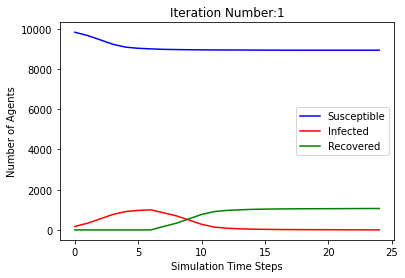

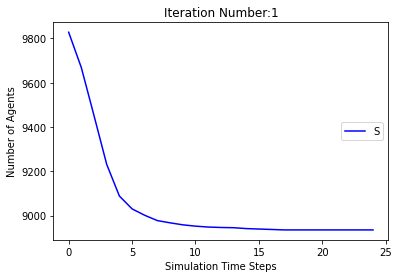

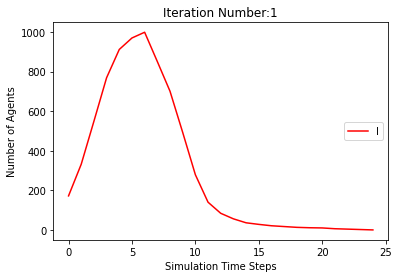

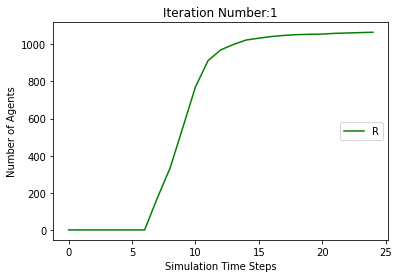

[9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885]
[172, 348, 569, 769, 913, 991, 1009, 855, 692, 486, 305, 171, 106, 96, 84, 74, 59, 40, 31, 18, 10, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 348, 569, 769, 913, 991, 1009, 1027, 1040, 1055, 1074, 1084, 1097, 1105, 1111, 1114, 1114, 1114, 1115]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885]]
[[], [172, 332, 549, 769, 912, 970, 999, 851, 701, 493, 279, 140, 84, 56, 36, 28, 21, 17, 13, 11, 10, 6, 4, 2, 0], [172, 348, 569, 769, 913, 991, 1009, 855, 692, 486, 305, 171, 106, 96, 84, 74, 59, 40, 31, 18, 10, 4, 1, 1, 1, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 172, 332, 549, 769, 912, 97

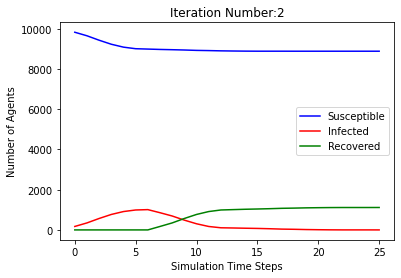

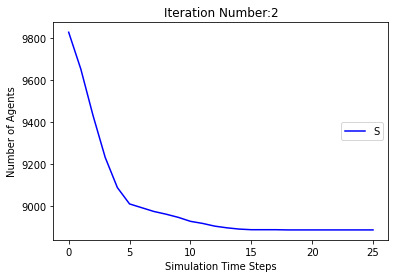

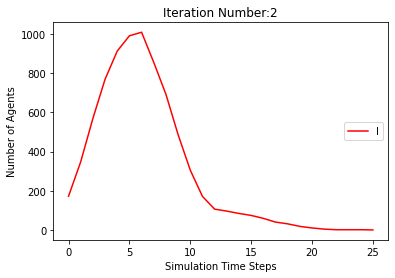

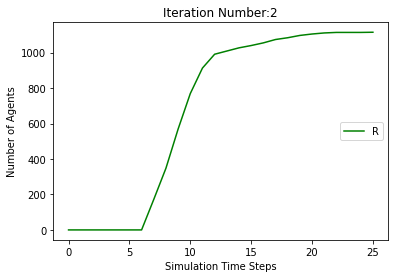

[9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883]
[172, 327, 534, 747, 896, 993, 1023, 875, 734, 533, 328, 190, 99, 75, 54, 40, 36, 31, 21, 15, 9, 7, 9, 9, 9, 10, 10, 10, 9, 7, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 327, 534, 747, 896, 993, 1023, 1047, 1061, 1067, 1075, 1086, 1092, 1098, 1101, 1101, 1103, 1106, 1107, 1107, 1107, 1108, 1110, 1112, 1115, 1117]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 888

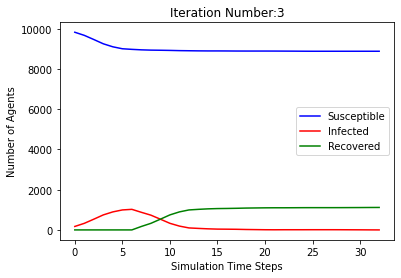

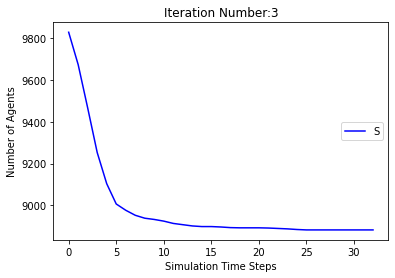

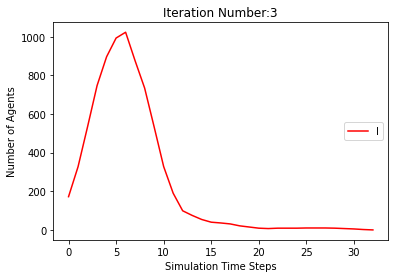

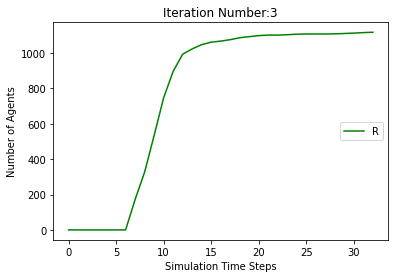

[9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923]
[172, 332, 547, 746, 893, 973, 1001, 835, 687, 483, 298, 155, 85, 65, 68, 57, 47, 33, 29, 19, 11, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 332, 547, 746, 893, 973, 1001, 1007, 1019, 1030, 1044, 1048, 1058, 1066, 1075, 1076, 1077]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

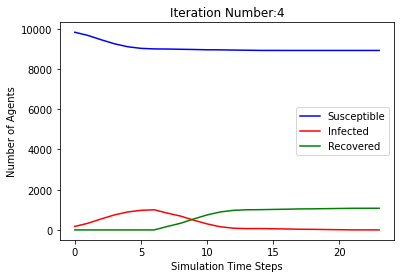

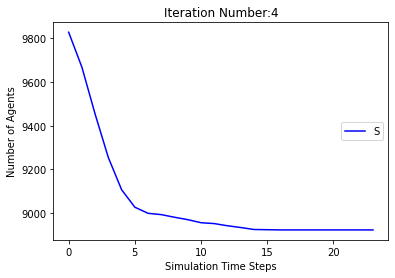

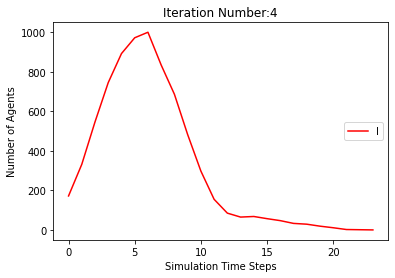

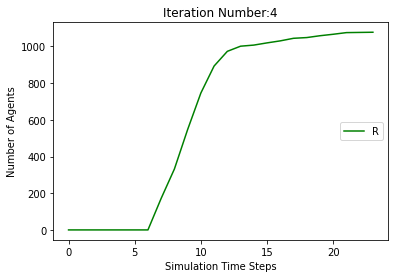

[9828, 9650, 9459, 9274, 9126, 9051, 9002, 8983, 8972, 8968, 8964, 8958, 8954, 8950, 8947, 8945, 8944, 8944, 8944, 8944, 8944, 8944, 8944, 8944]
[172, 350, 541, 726, 874, 949, 998, 845, 678, 491, 310, 168, 97, 52, 36, 27, 24, 20, 14, 10, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 350, 541, 726, 874, 949, 998, 1017, 1028, 1032, 1036, 1042, 1046, 1050, 1053, 1055, 1056]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 892

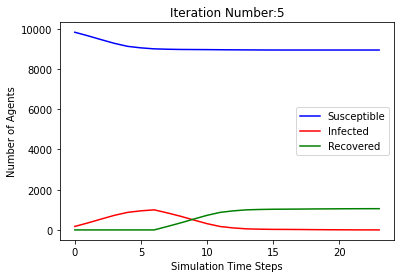

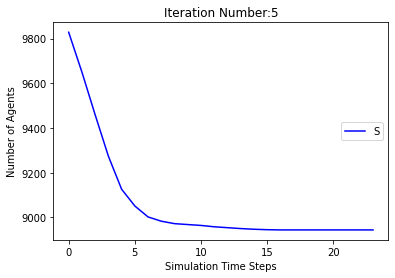

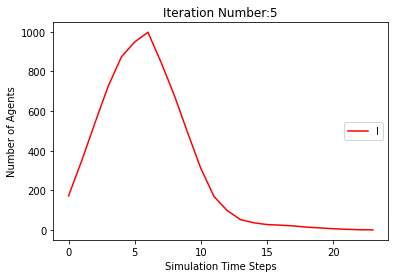

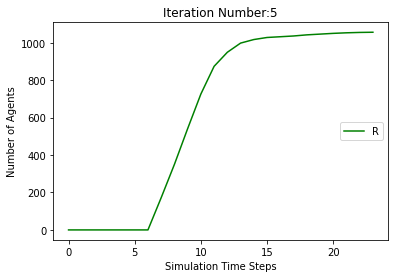

[9828, 9657, 9435, 9231, 9097, 9022, 8985, 8964, 8953, 8945, 8935, 8925, 8920, 8914, 8912, 8911, 8910, 8910, 8910, 8910, 8910, 8910, 8910, 8910]
[172, 343, 565, 769, 903, 978, 1015, 864, 704, 490, 296, 172, 102, 71, 52, 42, 35, 25, 15, 10, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 343, 565, 769, 903, 978, 1015, 1036, 1047, 1055, 1065, 1075, 1080, 1086, 1088, 1089, 1090]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

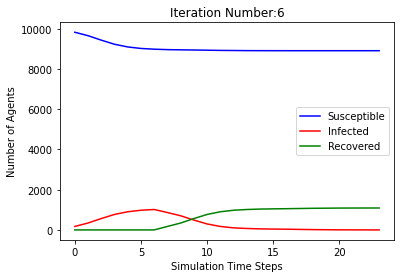

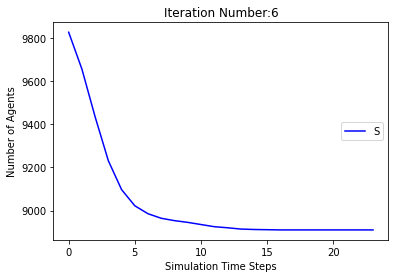

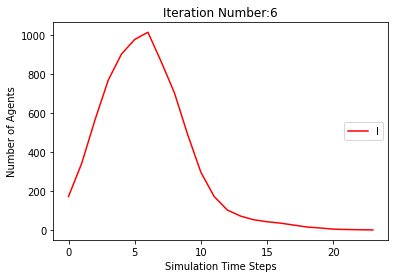

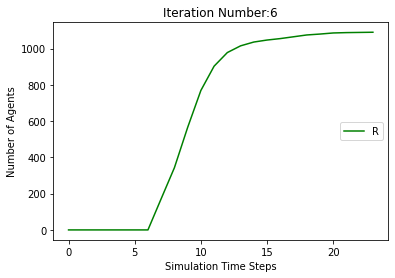

[9828, 9659, 9436, 9209, 9080, 9015, 8984, 8972, 8960, 8940, 8931, 8919, 8913, 8906, 8900, 8894, 8890, 8889, 8889, 8889, 8889, 8889, 8889, 8889, 8889]
[172, 341, 564, 791, 920, 985, 1016, 856, 699, 496, 278, 161, 102, 78, 72, 66, 50, 42, 30, 24, 17, 11, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 341, 564, 791, 920, 985, 1016, 1028, 1040, 1060, 1069, 1081, 1087, 1094, 1100, 1106, 1110, 1111]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8

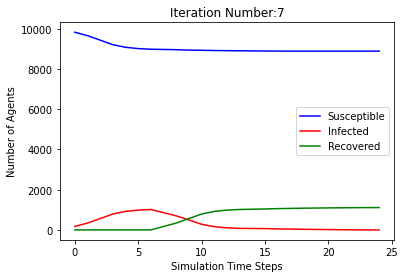

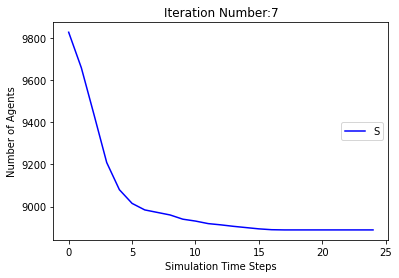

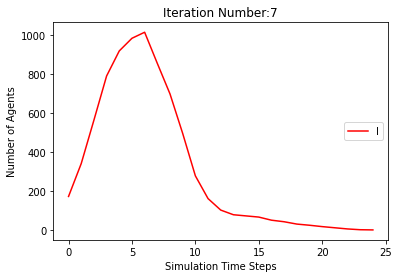

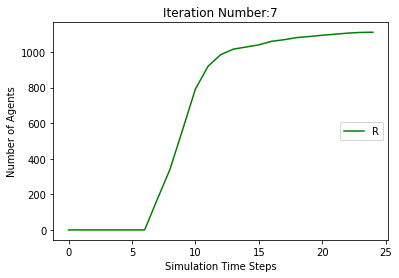

[9828, 9667, 9453, 9267, 9109, 9026, 8983, 8963, 8956, 8953, 8951, 8948, 8942, 8938, 8935, 8933, 8931, 8930, 8930, 8930, 8930, 8930, 8930, 8930, 8930]
[172, 333, 547, 733, 891, 974, 1017, 865, 711, 500, 316, 161, 84, 45, 28, 23, 22, 21, 18, 12, 8, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 333, 547, 733, 891, 974, 1017, 1037, 1044, 1047, 1049, 1052, 1058, 1062, 1065, 1067, 1069, 1070]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923

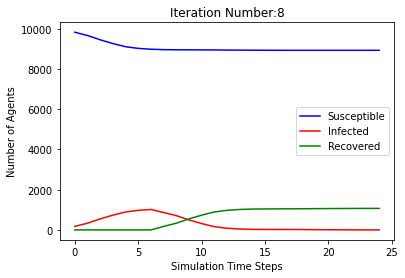

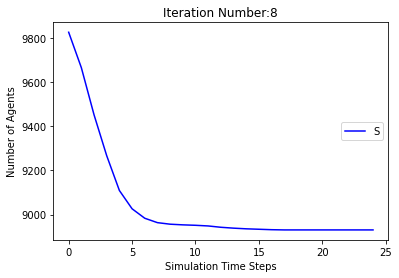

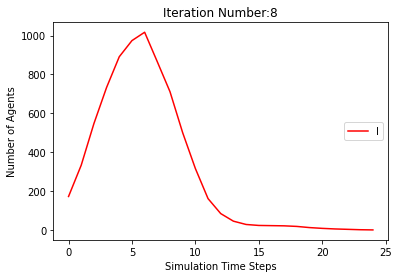

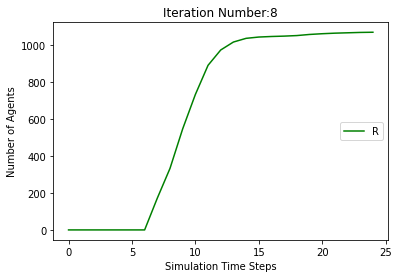

[9828, 9658, 9420, 9213, 9084, 9015, 8980, 8963, 8948, 8943, 8937, 8932, 8928, 8924, 8920, 8918, 8917, 8917, 8917, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[172, 342, 580, 787, 916, 985, 1020, 865, 710, 477, 276, 152, 87, 56, 43, 30, 26, 20, 15, 12, 8, 4, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 342, 580, 787, 916, 985, 1020, 1037, 1052, 1057, 1063, 1068, 1072, 1076, 1080, 1082, 1083, 1083, 1083, 1084]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952

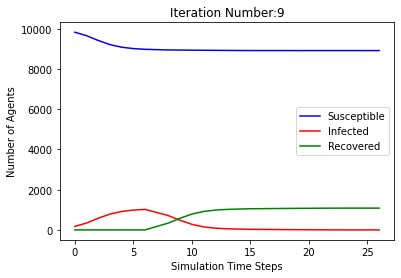

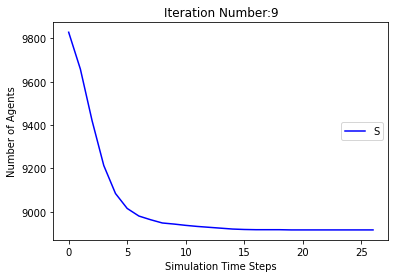

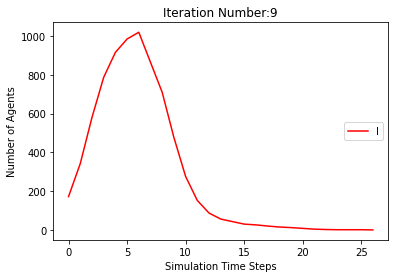

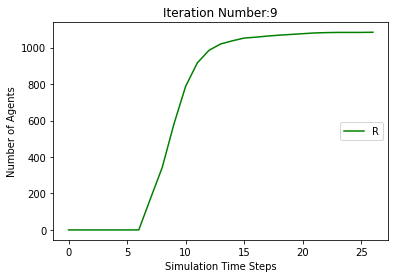

[9828, 9680, 9459, 9239, 9089, 9026, 8990, 8972, 8965, 8951, 8935, 8925, 8921, 8919, 8919, 8919, 8919, 8919, 8919, 8919, 8919]
[172, 320, 541, 761, 911, 974, 1010, 856, 715, 508, 304, 164, 105, 71, 53, 46, 32, 16, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 320, 541, 761, 911, 974, 1010, 1028, 1035, 1049, 1065, 1075, 1079, 1081]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 945

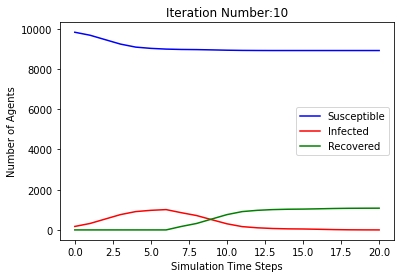

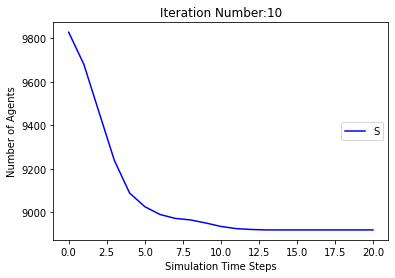

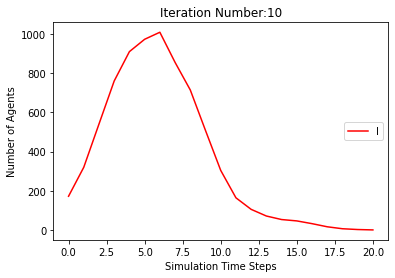

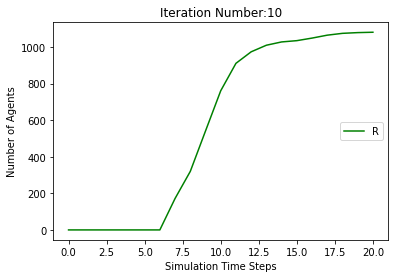

[9828, 9652, 9411, 9195, 9056, 8995, 8963, 8942, 8927, 8906, 8890, 8880, 8875, 8867, 8861, 8861, 8860, 8860, 8860, 8860, 8860, 8860, 8860, 8860]
[172, 348, 589, 805, 944, 1005, 1037, 886, 725, 505, 305, 176, 120, 96, 81, 66, 46, 30, 20, 15, 7, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 348, 589, 805, 944, 1005, 1037, 1058, 1073, 1094, 1110, 1120, 1125, 1133, 1139, 1139, 1140]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923

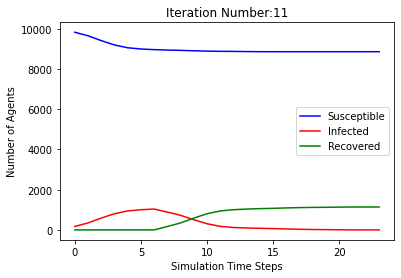

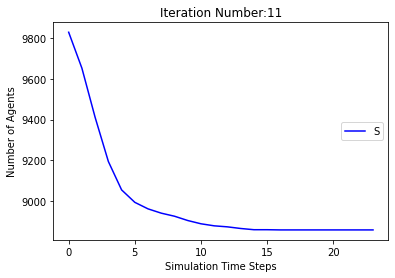

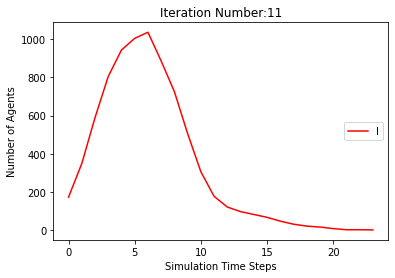

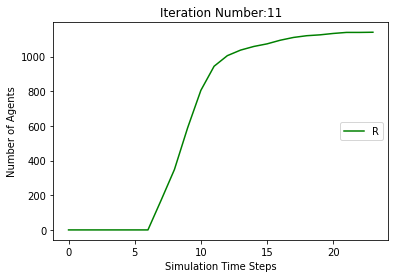

[9828, 9674, 9449, 9240, 9106, 9032, 9001, 8982, 8968, 8959, 8954, 8946, 8944, 8940, 8937, 8937, 8937, 8937, 8937, 8937, 8937, 8937]
[172, 326, 551, 760, 894, 968, 999, 846, 706, 490, 286, 160, 88, 61, 45, 31, 22, 17, 9, 7, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 326, 551, 760, 894, 968, 999, 1018, 1032, 1041, 1046, 1054, 1056, 1060, 1063]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [982

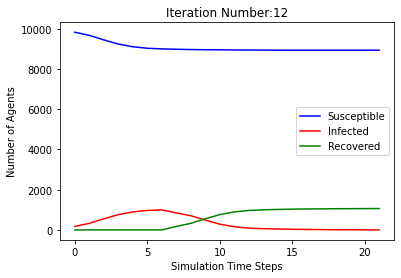

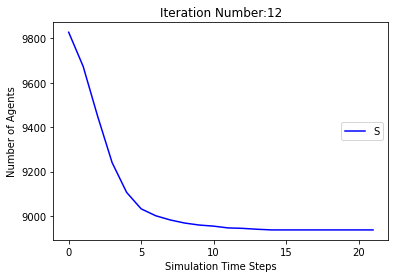

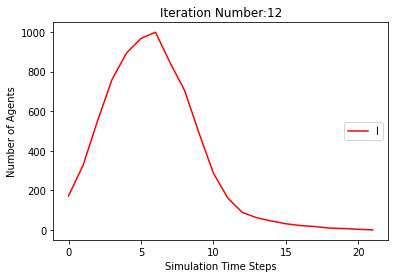

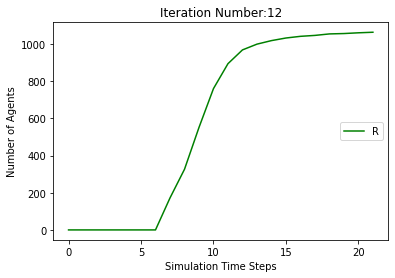

[9828, 9653, 9413, 9197, 9062, 9002, 8981, 8974, 8969, 8957, 8951, 8944, 8937, 8930, 8926, 8924, 8924, 8924, 8924, 8924, 8924, 8924, 8924]
[172, 347, 587, 803, 938, 998, 1019, 854, 684, 456, 246, 118, 65, 51, 48, 45, 33, 27, 20, 13, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 347, 587, 803, 938, 998, 1019, 1026, 1031, 1043, 1049, 1056, 1063, 1070, 1074, 1076]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923

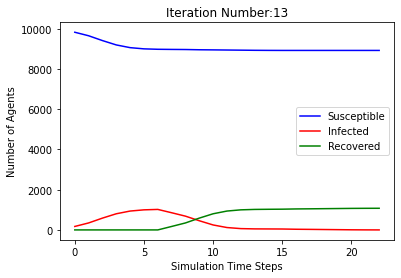

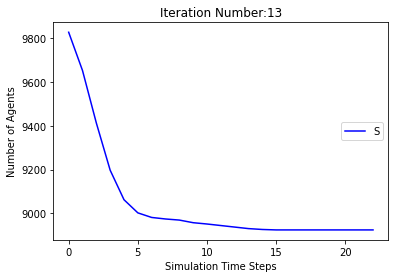

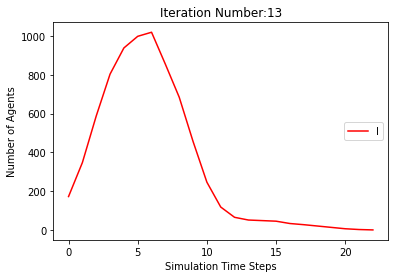

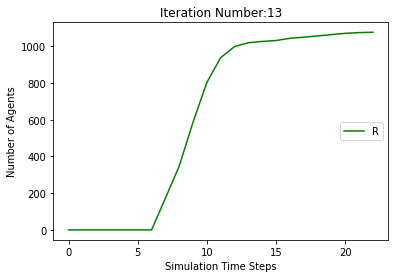

[9828, 9655, 9424, 9229, 9085, 9010, 8974, 8958, 8946, 8934, 8928, 8924, 8919, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[172, 345, 576, 771, 915, 990, 1026, 870, 709, 490, 301, 161, 91, 58, 42, 30, 18, 12, 8, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 345, 576, 771, 915, 990, 1026, 1042, 1054, 1066, 1072, 1076, 1081, 1084]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459

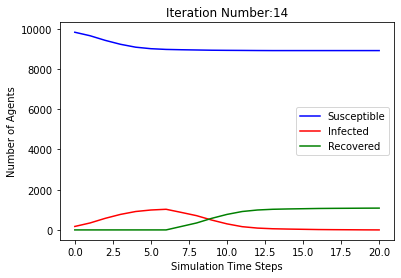

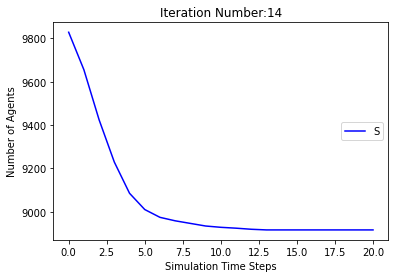

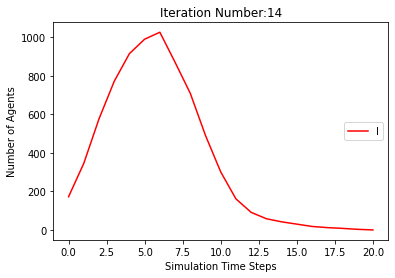

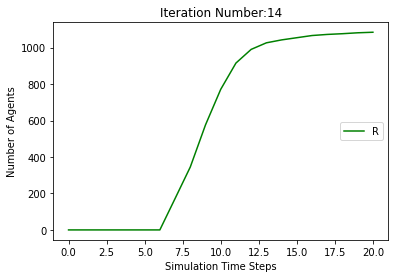

[9828, 9670, 9454, 9250, 9118, 9052, 9004, 8976, 8964, 8950, 8938, 8933, 8930, 8927, 8923, 8922, 8920, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[172, 330, 546, 750, 882, 948, 996, 852, 706, 504, 312, 185, 122, 77, 53, 42, 30, 22, 17, 14, 11, 7, 6, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 546, 750, 882, 948, 996, 1024, 1036, 1050, 1062, 1067, 1070, 1073, 1077, 1078, 1080, 1084]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923

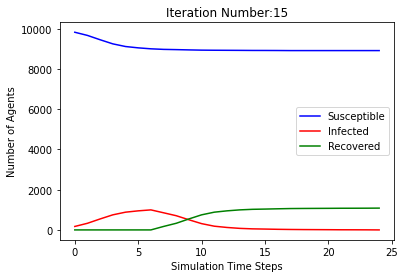

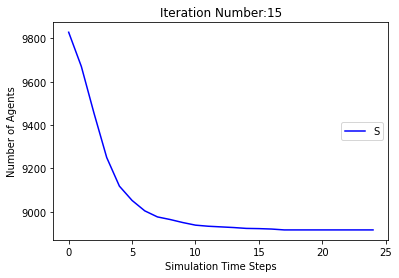

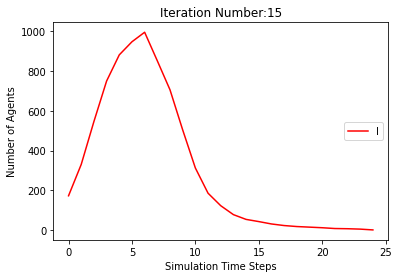

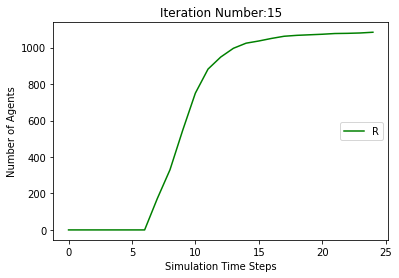

[9828, 9641, 9411, 9202, 9077, 9023, 8995, 8979, 8967, 8960, 8949, 8945, 8942, 8940, 8939, 8939, 8938, 8936, 8933, 8930, 8930, 8930, 8930, 8930, 8930, 8930, 8930]
[172, 359, 589, 798, 923, 977, 1005, 849, 674, 451, 253, 132, 81, 55, 40, 28, 22, 13, 12, 12, 10, 9, 9, 8, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 359, 589, 798, 923, 977, 1005, 1021, 1033, 1040, 1051, 1055, 1058, 1060, 1061, 1061, 1062, 1064, 1067, 1070]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

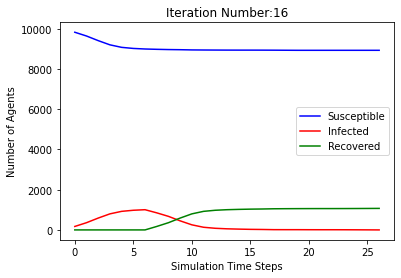

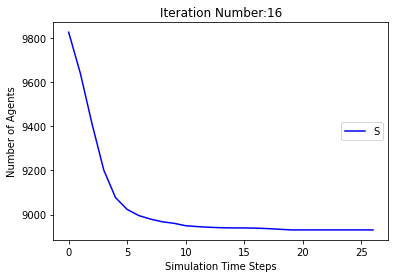

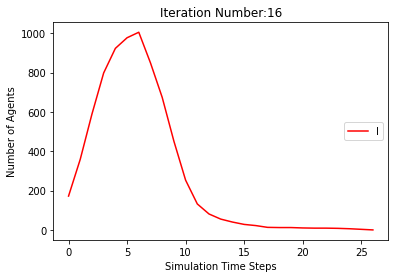

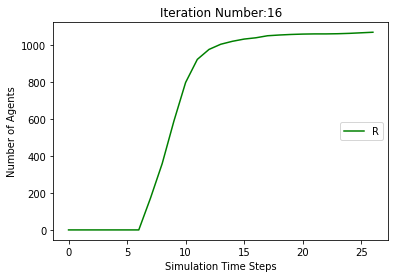

[9828, 9650, 9436, 9205, 9068, 9001, 8968, 8945, 8933, 8915, 8900, 8892, 8889, 8885, 8882, 8879, 8876, 8876, 8876, 8876, 8876, 8876, 8876, 8876]
[172, 350, 564, 795, 932, 999, 1032, 883, 717, 521, 305, 176, 112, 83, 63, 54, 39, 24, 16, 13, 9, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 350, 564, 795, 932, 999, 1032, 1055, 1067, 1085, 1100, 1108, 1111, 1115, 1118, 1121, 1124]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

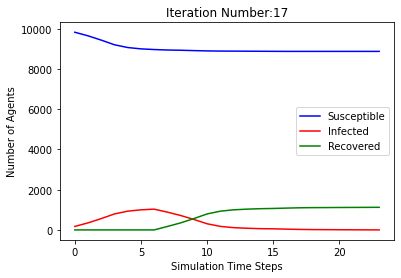

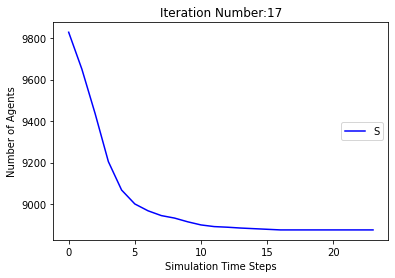

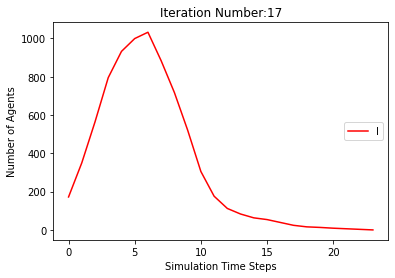

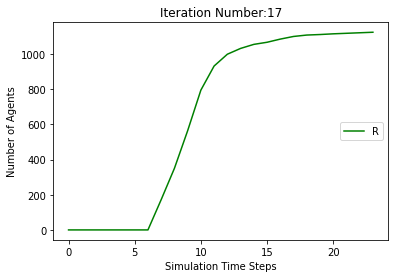

[9828, 9670, 9466, 9272, 9107, 9022, 8986, 8962, 8950, 8927, 8910, 8898, 8896, 8894, 8890, 8888, 8887, 8886, 8885, 8883, 8880, 8878, 8878, 8878, 8878, 8878, 8878, 8878, 8878]
[172, 330, 534, 728, 893, 978, 1014, 866, 720, 539, 362, 209, 126, 92, 72, 62, 40, 24, 13, 13, 14, 12, 10, 9, 8, 7, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 534, 728, 893, 978, 1014, 1038, 1050, 1073, 1090, 1102, 1104, 1106, 1110, 1112, 1113, 1114, 1115, 1117, 1120, 1122]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 

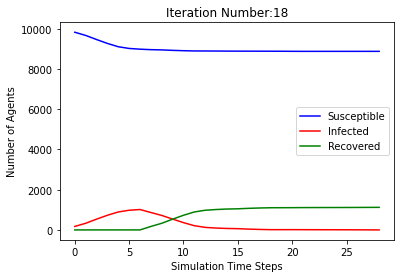

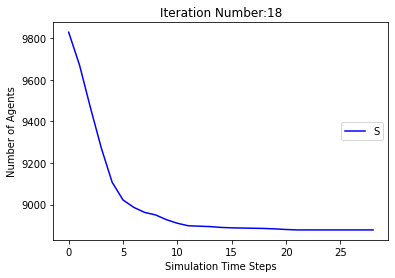

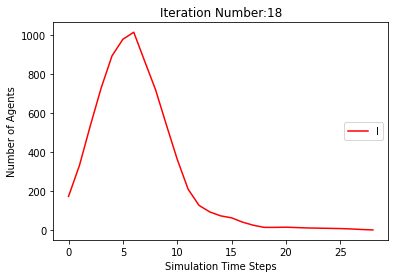

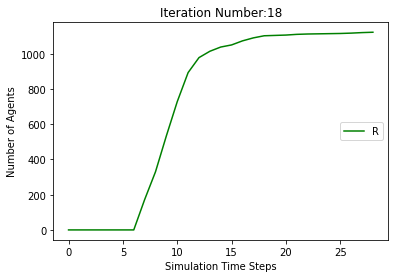

[9828, 9670, 9452, 9239, 9084, 8998, 8960, 8949, 8938, 8926, 8917, 8912, 8911, 8910, 8908, 8907, 8905, 8904, 8901, 8900, 8900, 8900, 8900, 8900, 8900, 8900, 8900]
[172, 330, 548, 761, 916, 1002, 1040, 879, 732, 526, 322, 172, 87, 50, 41, 31, 21, 13, 11, 11, 10, 8, 7, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 548, 761, 916, 1002, 1040, 1051, 1062, 1074, 1083, 1088, 1089, 1090, 1092, 1093, 1095, 1096, 1099, 1100]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8

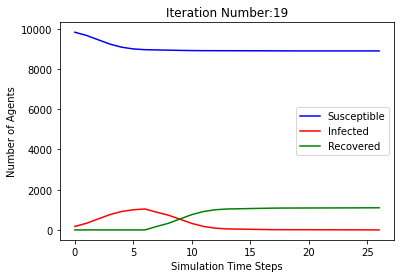

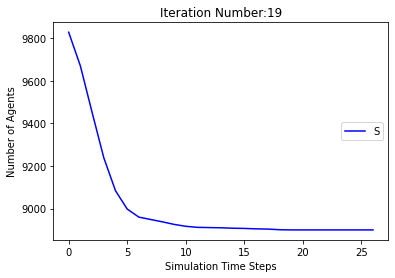

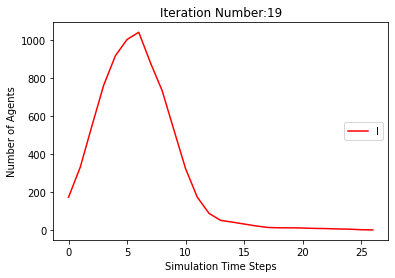

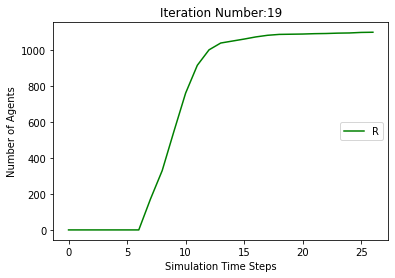

[9828, 9659, 9445, 9227, 9084, 9017, 8986, 8969, 8959, 8943, 8933, 8927, 8922, 8918, 8914, 8913, 8910, 8909, 8909, 8909, 8909, 8909, 8909, 8909, 8909]
[172, 341, 555, 773, 916, 983, 1014, 859, 700, 502, 294, 157, 95, 68, 55, 46, 33, 24, 18, 13, 9, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 341, 555, 773, 916, 983, 1014, 1031, 1041, 1057, 1067, 1073, 1078, 1082, 1086, 1087, 1090, 1091]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923

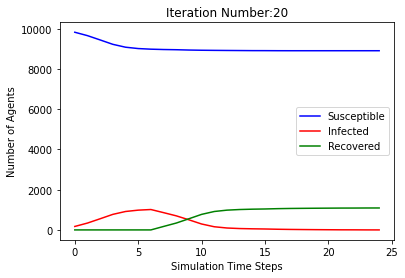

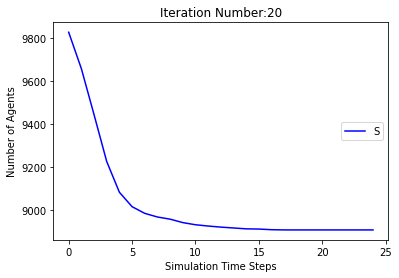

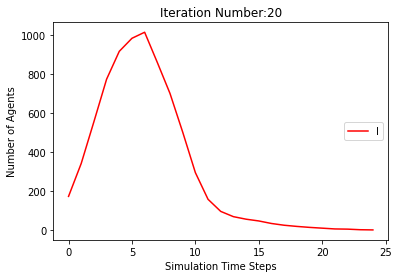

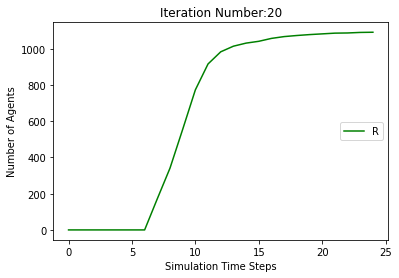

[9828, 9654, 9426, 9221, 9094, 9035, 9012, 8998, 8987, 8977, 8970, 8962, 8952, 8948, 8946, 8945, 8945, 8945, 8945, 8945, 8945, 8945, 8945]
[172, 346, 574, 779, 906, 965, 988, 830, 667, 449, 251, 132, 83, 64, 52, 42, 32, 25, 17, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 346, 574, 779, 906, 965, 988, 1002, 1013, 1023, 1030, 1038, 1048, 1052, 1054, 1055]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8

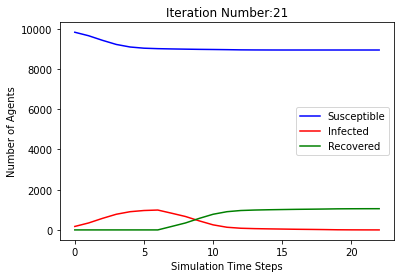

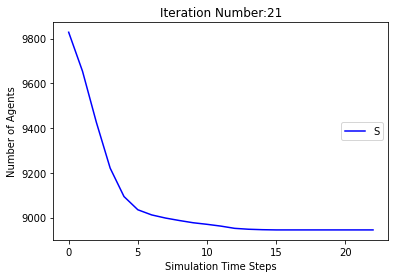

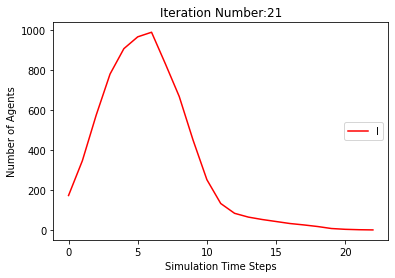

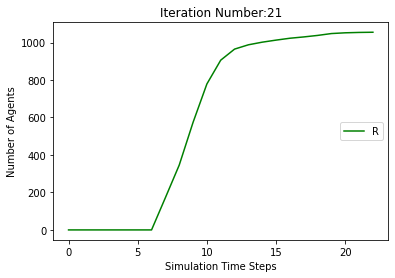

[9828, 9660, 9446, 9230, 9089, 9012, 8958, 8934, 8925, 8920, 8915, 8912, 8907, 8905, 8904, 8904, 8900, 8896, 8896, 8896, 8896, 8896, 8896, 8896, 8896]
[172, 340, 554, 770, 911, 988, 1042, 894, 735, 526, 315, 177, 105, 53, 30, 21, 20, 19, 16, 11, 9, 8, 8, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 340, 554, 770, 911, 988, 1042, 1066, 1075, 1080, 1085, 1088, 1093, 1095, 1096, 1096, 1100, 1104]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 892

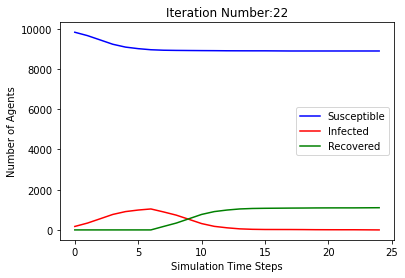

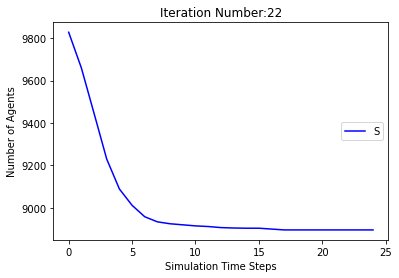

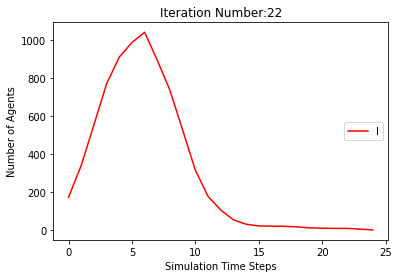

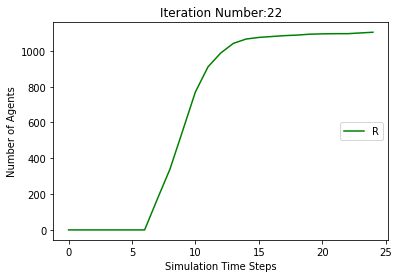

[9828, 9655, 9425, 9205, 9066, 9012, 8981, 8966, 8953, 8944, 8937, 8934, 8934, 8934, 8934, 8934, 8934, 8934, 8934]
[172, 345, 575, 795, 934, 988, 1019, 862, 702, 481, 268, 132, 78, 47, 32, 19, 10, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 345, 575, 795, 934, 988, 1019, 1034, 1047, 1056, 1063, 1066]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459, 9274, 9126, 9051, 9002, 8983,

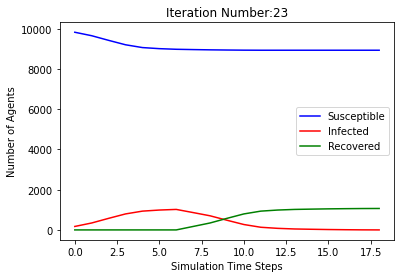

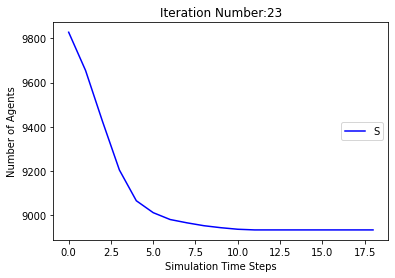

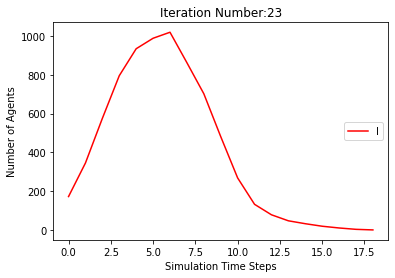

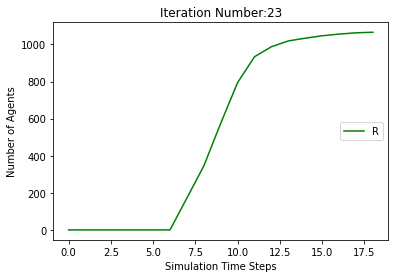

[9828, 9671, 9463, 9257, 9113, 9032, 8991, 8964, 8946, 8937, 8933, 8927, 8919, 8911, 8909, 8909, 8909, 8909, 8909, 8909, 8909, 8909]
[172, 329, 537, 743, 887, 968, 1009, 864, 725, 526, 324, 186, 113, 80, 55, 37, 28, 24, 18, 10, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 329, 537, 743, 887, 968, 1009, 1036, 1054, 1063, 1067, 1073, 1081, 1089, 1091]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923],

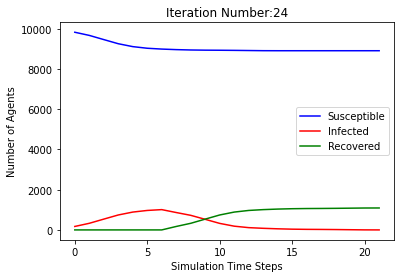

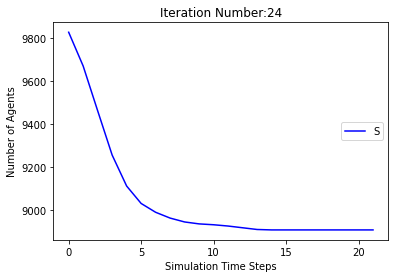

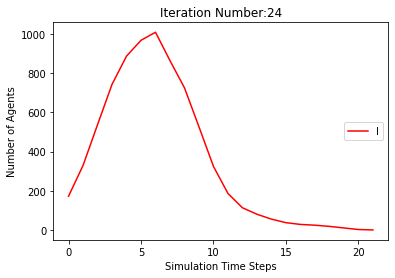

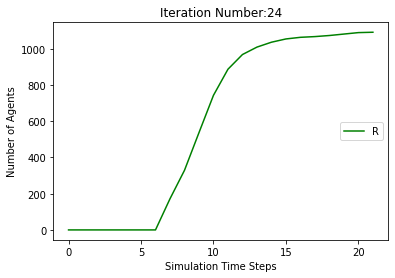

[9828, 9667, 9449, 9247, 9110, 9032, 8999, 8973, 8956, 8944, 8936, 8929, 8924, 8918, 8914, 8911, 8907, 8900, 8897, 8896, 8896, 8894, 8894, 8893, 8892, 8892, 8892, 8892, 8892, 8892, 8892, 8892]
[172, 333, 551, 753, 890, 968, 1001, 855, 711, 505, 311, 181, 108, 81, 59, 45, 37, 36, 32, 28, 22, 20, 17, 14, 8, 5, 4, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 333, 551, 753, 890, 968, 1001, 1027, 1044, 1056, 1064, 1071, 1076, 1082, 1086, 1089, 1093, 1100, 1103, 1104, 1104, 1106, 1106, 1107, 1108]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883

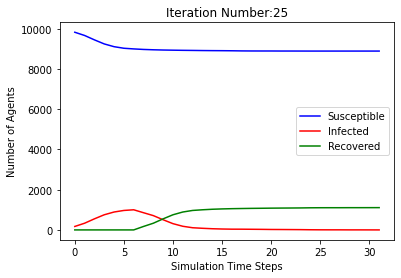

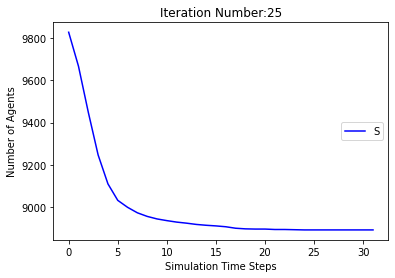

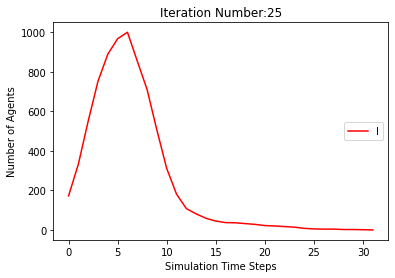

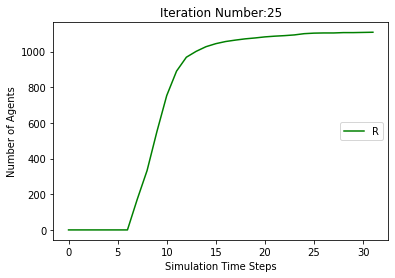

[9828, 9671, 9463, 9250, 9093, 9010, 8978, 8955, 8944, 8932, 8923, 8919, 8913, 8911, 8910, 8910, 8910, 8910, 8910, 8910, 8910, 8910]
[172, 329, 537, 750, 907, 990, 1022, 873, 727, 531, 327, 174, 97, 67, 45, 34, 22, 13, 9, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 329, 537, 750, 907, 990, 1022, 1045, 1056, 1068, 1077, 1081, 1087, 1089, 1090]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9

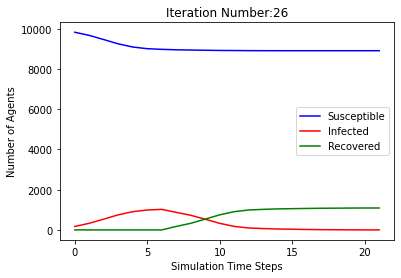

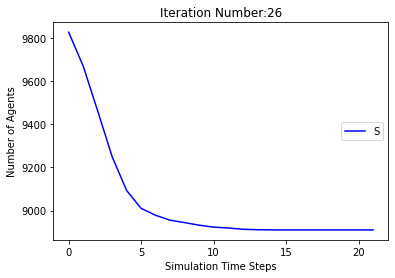

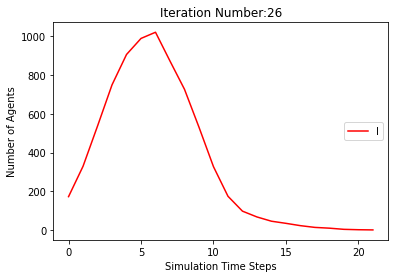

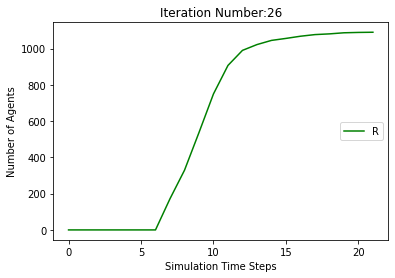

[9828, 9645, 9418, 9214, 9086, 9023, 8976, 8947, 8925, 8913, 8904, 8901, 8895, 8892, 8889, 8886, 8885, 8885, 8882, 8879, 8879, 8879, 8878, 8878, 8878, 8878, 8878, 8878, 8878, 8878]
[172, 355, 582, 786, 914, 977, 1024, 881, 720, 505, 310, 185, 128, 84, 58, 39, 28, 19, 19, 16, 13, 10, 8, 7, 7, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 355, 582, 786, 914, 977, 1024, 1053, 1075, 1087, 1096, 1099, 1105, 1108, 1111, 1114, 1115, 1115, 1118, 1121, 1121, 1121, 1122]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254

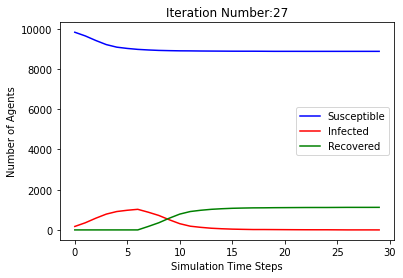

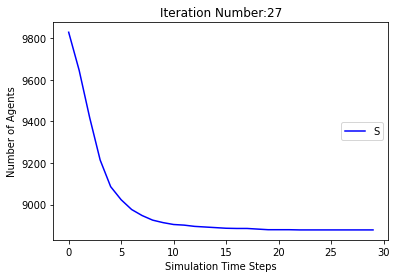

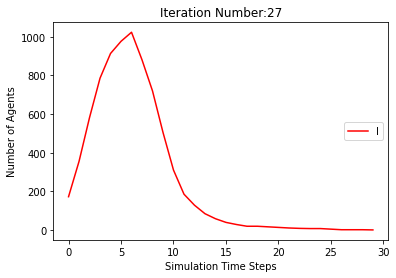

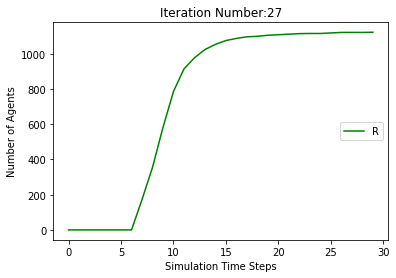

[9828, 9650, 9422, 9208, 9083, 9017, 8979, 8952, 8942, 8935, 8932, 8931, 8928, 8925, 8922, 8920, 8920, 8920, 8920, 8920, 8920, 8920, 8920]
[172, 350, 578, 792, 917, 983, 1021, 876, 708, 487, 276, 152, 89, 54, 30, 22, 15, 12, 11, 8, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 350, 578, 792, 917, 983, 1021, 1048, 1058, 1065, 1068, 1069, 1072, 1075, 1078, 1080]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923,

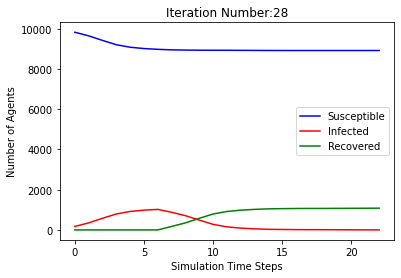

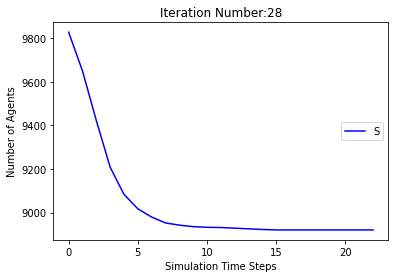

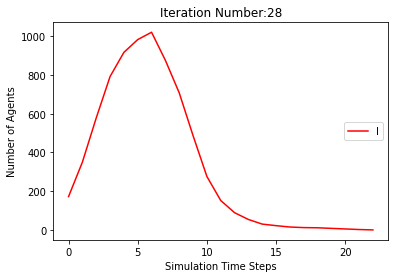

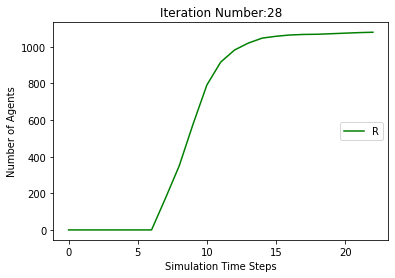

[9828, 9668, 9453, 9248, 9110, 9043, 8997, 8962, 8942, 8937, 8929, 8922, 8915, 8910, 8906, 8902, 8901, 8901, 8901, 8901, 8901, 8901, 8901, 8901]
[172, 332, 547, 752, 890, 957, 1003, 866, 726, 516, 319, 188, 128, 87, 56, 40, 36, 28, 21, 14, 9, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 332, 547, 752, 890, 957, 1003, 1038, 1058, 1063, 1071, 1078, 1085, 1090, 1094, 1098, 1099]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

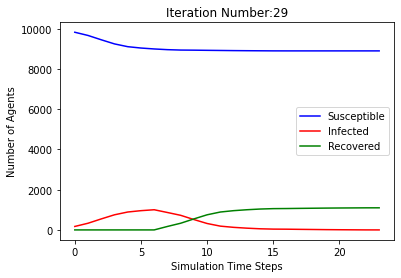

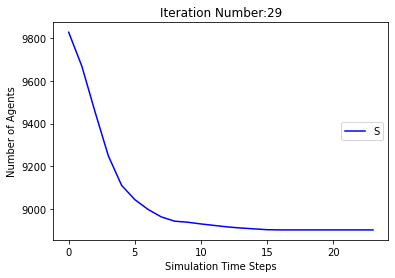

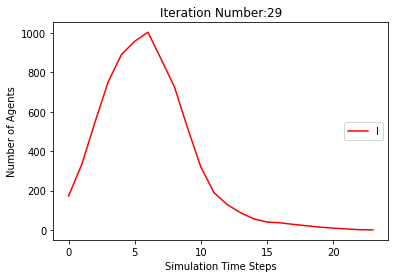

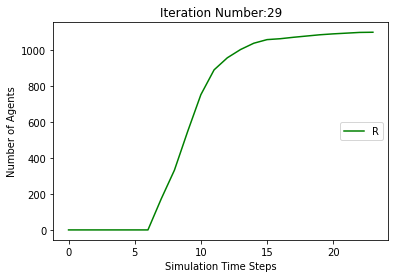

[9828, 9657, 9456, 9253, 9120, 9027, 8987, 8967, 8957, 8947, 8945, 8944, 8942, 8941, 8936, 8935, 8934, 8934, 8934, 8934, 8934, 8934, 8934, 8934]
[172, 343, 544, 747, 880, 973, 1013, 861, 700, 509, 308, 176, 85, 46, 31, 22, 13, 11, 10, 8, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 343, 544, 747, 880, 973, 1013, 1033, 1043, 1053, 1055, 1056, 1058, 1059, 1064, 1065, 1066]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 89

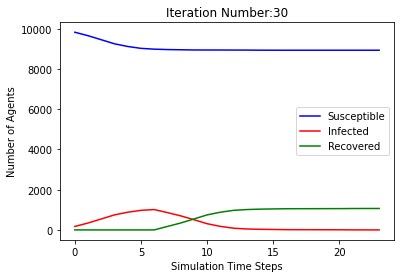

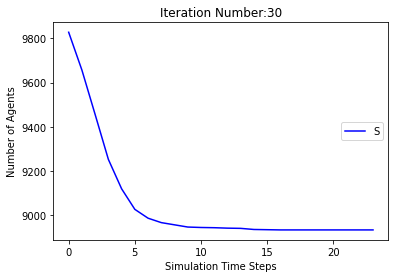

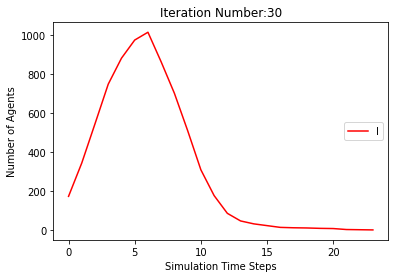

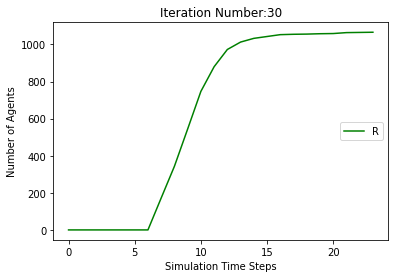

[9828, 9661, 9459, 9257, 9099, 9027, 8986, 8957, 8935, 8920, 8911, 8905, 8898, 8896, 8895, 8892, 8891, 8890, 8890, 8890, 8890, 8890, 8890, 8890, 8890]
[172, 339, 541, 743, 901, 973, 1014, 871, 726, 539, 346, 194, 129, 90, 62, 43, 29, 21, 15, 8, 6, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 339, 541, 743, 901, 973, 1014, 1043, 1065, 1080, 1089, 1095, 1102, 1104, 1105, 1108, 1109, 1110]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923

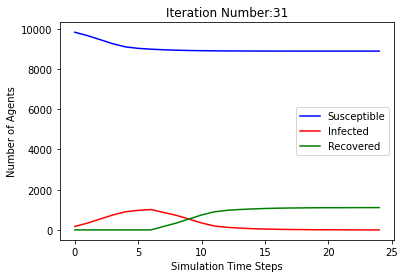

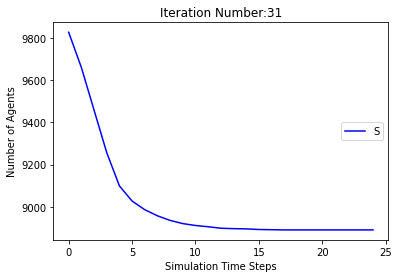

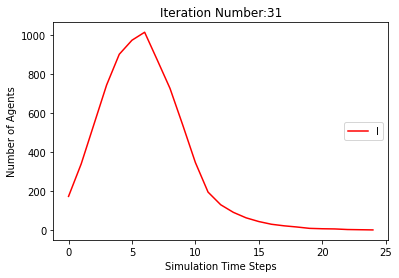

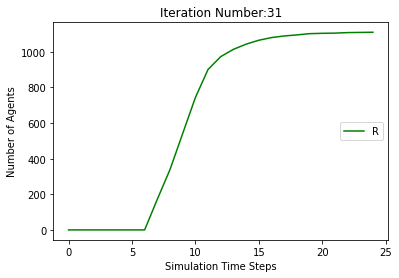

[9828, 9646, 9419, 9210, 9073, 8993, 8972, 8957, 8948, 8939, 8931, 8926, 8918, 8912, 8908, 8905, 8903, 8903, 8903, 8902, 8901, 8899, 8897, 8894, 8893, 8893, 8893, 8893, 8893, 8893, 8893, 8893]
[172, 354, 581, 790, 927, 1007, 1028, 871, 698, 480, 279, 147, 75, 60, 49, 43, 36, 28, 23, 16, 11, 9, 8, 9, 10, 10, 9, 8, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 354, 581, 790, 927, 1007, 1028, 1043, 1052, 1061, 1069, 1074, 1082, 1088, 1092, 1095, 1097, 1097, 1097, 1098, 1099, 1101, 1103, 1106, 1107]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883

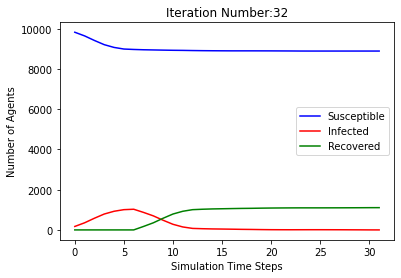

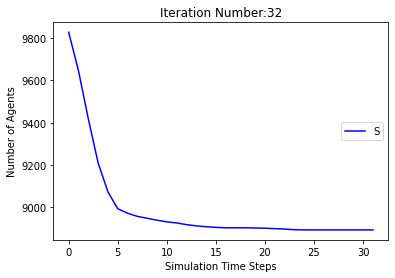

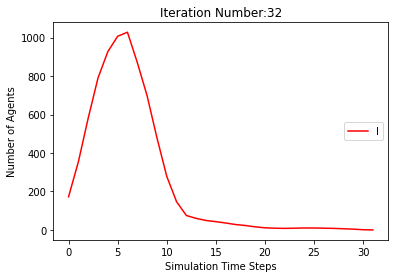

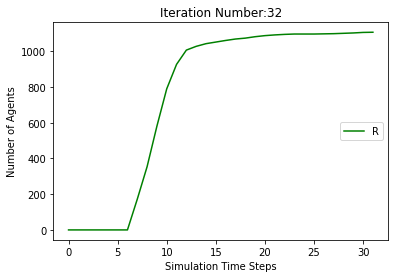

[9828, 9673, 9460, 9240, 9089, 9018, 8980, 8955, 8950, 8942, 8933, 8923, 8921, 8918, 8917, 8915, 8912, 8910, 8910, 8910, 8910, 8910, 8909, 8907, 8905, 8905, 8905, 8905, 8905, 8905, 8905, 8905]
[172, 327, 540, 760, 911, 982, 1020, 873, 723, 518, 307, 166, 97, 62, 38, 35, 30, 23, 13, 11, 8, 7, 6, 5, 5, 5, 5, 5, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 327, 540, 760, 911, 982, 1020, 1045, 1050, 1058, 1067, 1077, 1079, 1082, 1083, 1085, 1088, 1090, 1090, 1090, 1090, 1090, 1091, 1093, 1095]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 888

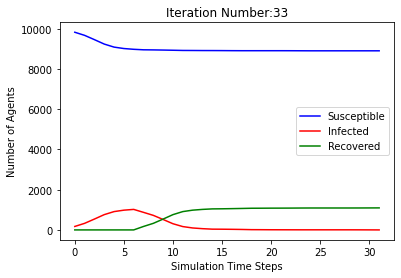

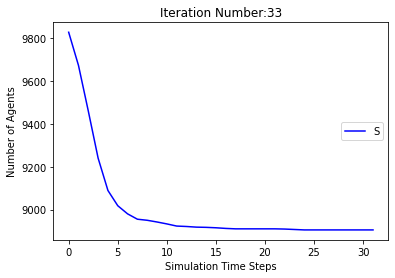

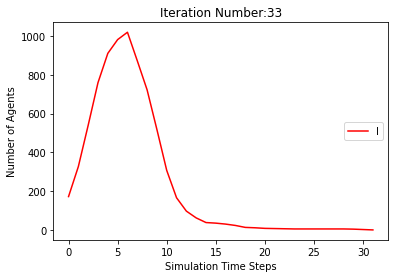

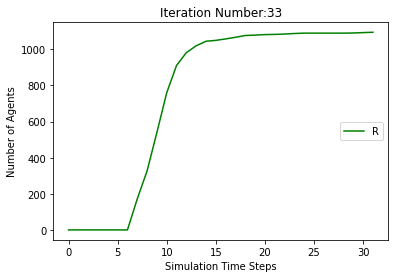

[9828, 9670, 9455, 9251, 9105, 9034, 8993, 8967, 8954, 8947, 8942, 8930, 8923, 8918, 8915, 8915, 8915, 8915, 8915, 8915, 8915, 8915]
[172, 330, 545, 749, 895, 966, 1007, 861, 716, 508, 309, 175, 111, 75, 52, 39, 32, 27, 15, 8, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 545, 749, 895, 966, 1007, 1033, 1046, 1053, 1058, 1070, 1077, 1082, 1085]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], 

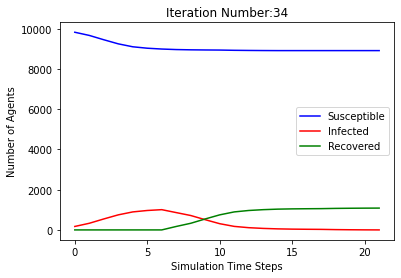

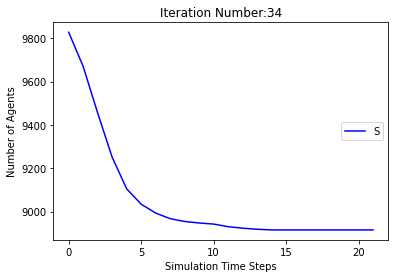

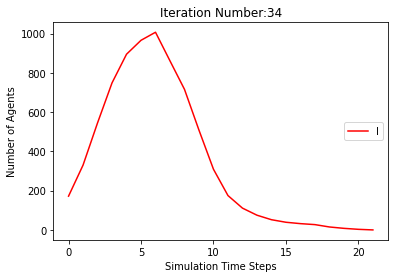

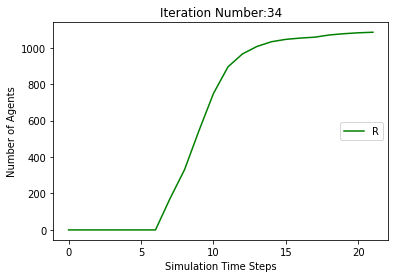

[9828, 9657, 9425, 9231, 9104, 9035, 8999, 8975, 8961, 8948, 8939, 8932, 8927, 8925, 8920, 8918, 8916, 8914, 8914, 8914, 8914, 8914, 8914, 8914, 8914]
[172, 343, 575, 769, 896, 965, 1001, 853, 696, 477, 292, 172, 108, 74, 55, 43, 32, 25, 18, 13, 11, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 343, 575, 769, 896, 965, 1001, 1025, 1039, 1052, 1061, 1068, 1073, 1075, 1080, 1082, 1084, 1086]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 89

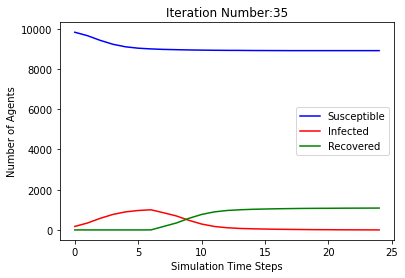

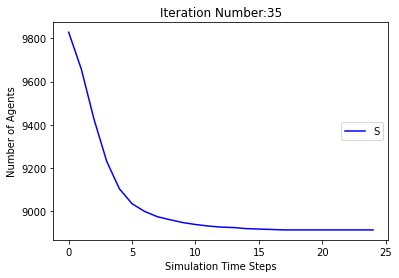

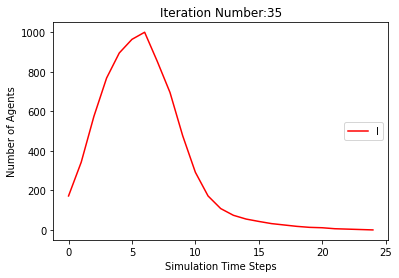

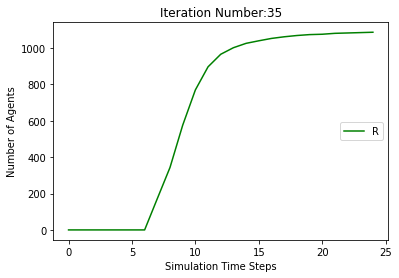

[9828, 9668, 9460, 9256, 9122, 9046, 9005, 8974, 8958, 8943, 8931, 8924, 8914, 8908, 8906, 8902, 8902, 8901, 8901, 8901, 8901, 8901, 8901, 8901, 8901]
[172, 332, 540, 744, 878, 954, 995, 854, 710, 517, 325, 198, 132, 97, 68, 56, 41, 30, 23, 13, 7, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 332, 540, 744, 878, 954, 995, 1026, 1042, 1057, 1069, 1076, 1086, 1092, 1094, 1098, 1098, 1099]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923,

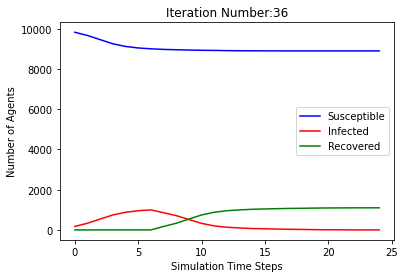

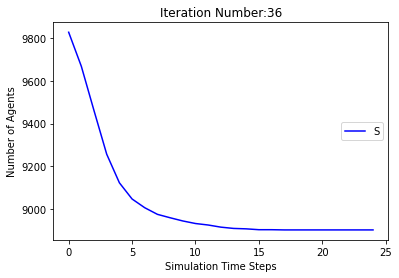

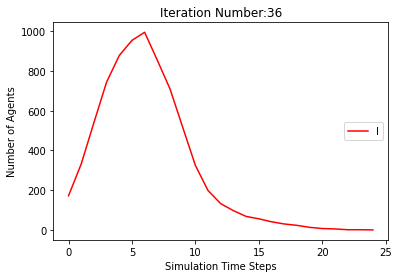

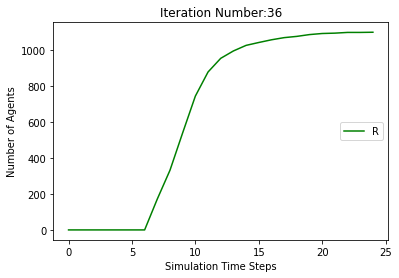

[9828, 9670, 9437, 9230, 9077, 9022, 8987, 8972, 8963, 8957, 8953, 8944, 8943, 8942, 8939, 8938, 8938, 8937, 8937, 8937, 8937, 8937, 8937, 8937, 8937]
[172, 330, 563, 770, 923, 978, 1013, 856, 707, 480, 277, 133, 79, 45, 33, 25, 19, 16, 7, 6, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 563, 770, 923, 978, 1013, 1028, 1037, 1043, 1047, 1056, 1057, 1058, 1061, 1062, 1062, 1063]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 

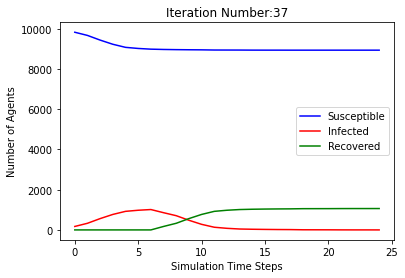

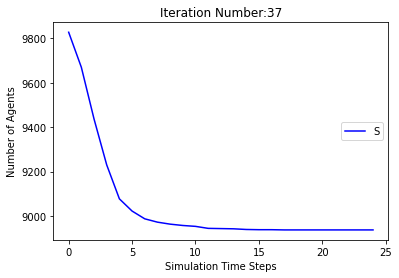

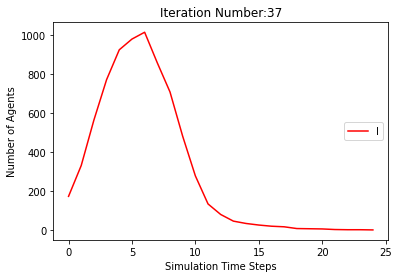

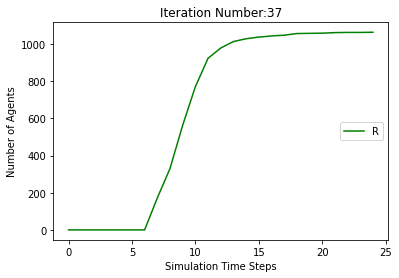

[9828, 9647, 9414, 9228, 9100, 9019, 8985, 8966, 8956, 8947, 8941, 8931, 8924, 8919, 8916, 8913, 8909, 8907, 8905, 8905, 8905, 8905, 8905, 8905, 8905, 8905]
[172, 353, 586, 772, 900, 981, 1015, 862, 691, 467, 287, 169, 95, 66, 50, 43, 38, 34, 26, 19, 14, 11, 8, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 353, 586, 772, 900, 981, 1015, 1034, 1044, 1053, 1059, 1069, 1076, 1081, 1084, 1087, 1091, 1093, 1095]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934,

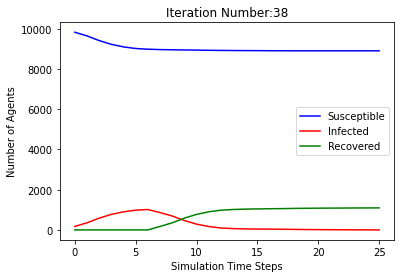

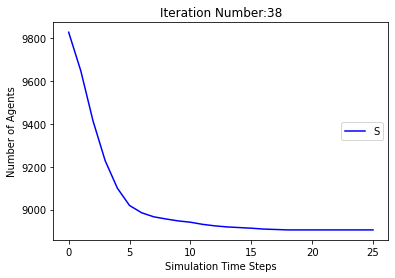

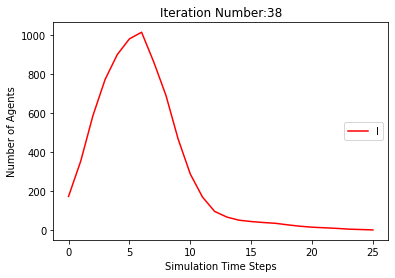

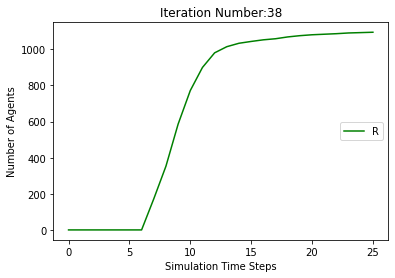

[9828, 9673, 9455, 9237, 9101, 9018, 8977, 8955, 8944, 8933, 8927, 8921, 8915, 8912, 8908, 8906, 8904, 8904, 8904, 8904, 8904, 8904, 8904, 8904]
[172, 327, 545, 763, 899, 982, 1023, 873, 729, 522, 310, 180, 103, 65, 47, 38, 29, 23, 17, 11, 8, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 327, 545, 763, 899, 982, 1023, 1045, 1056, 1067, 1073, 1079, 1085, 1088, 1092, 1094, 1096]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

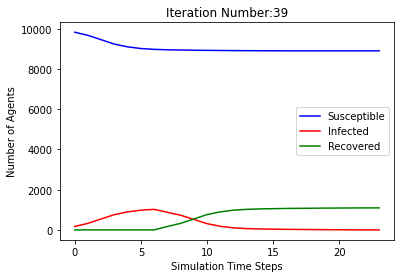

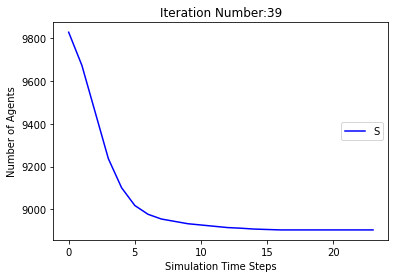

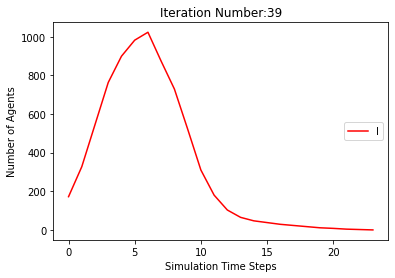

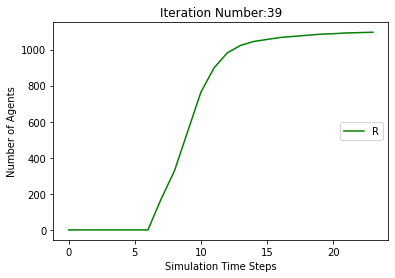

[9828, 9655, 9421, 9223, 9095, 9032, 9001, 8988, 8977, 8969, 8961, 8951, 8947, 8940, 8933, 8931, 8926, 8925, 8925, 8925, 8925, 8925, 8925, 8925, 8925]
[172, 345, 579, 777, 905, 968, 999, 840, 678, 452, 262, 144, 85, 61, 55, 46, 43, 36, 26, 22, 15, 8, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 345, 579, 777, 905, 968, 999, 1012, 1023, 1031, 1039, 1049, 1053, 1060, 1067, 1069, 1074, 1075]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923,

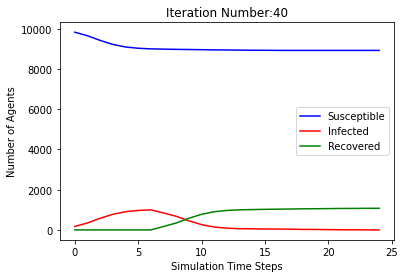

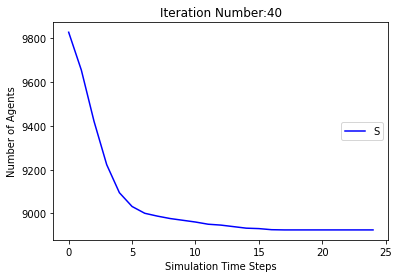

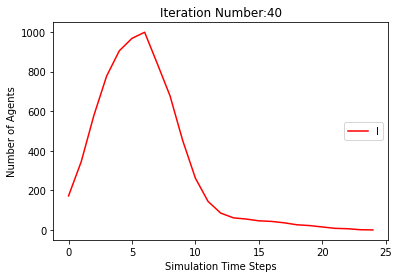

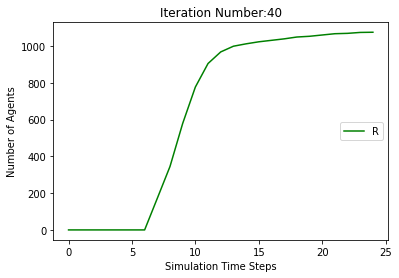

[9828, 9663, 9450, 9237, 9083, 9026, 8994, 8978, 8964, 8954, 8949, 8947, 8944, 8942, 8941, 8941, 8941, 8941, 8941, 8941, 8941, 8941]
[172, 337, 550, 763, 917, 974, 1006, 850, 699, 496, 288, 136, 82, 52, 37, 23, 13, 8, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 337, 550, 763, 917, 974, 1006, 1022, 1036, 1046, 1051, 1053, 1056, 1058, 1059]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [98

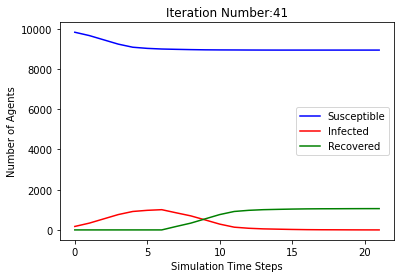

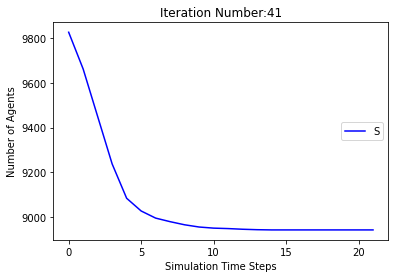

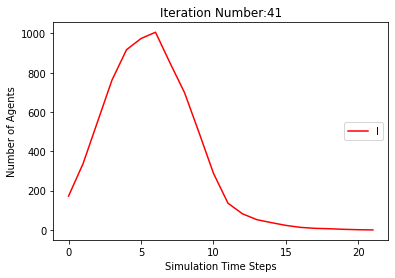

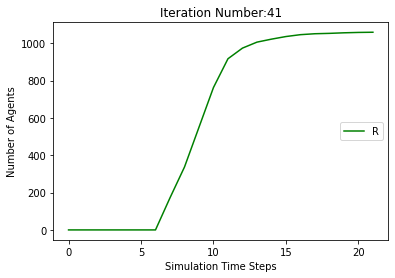

[9828, 9669, 9453, 9246, 9101, 9023, 8986, 8961, 8952, 8941, 8928, 8920, 8908, 8905, 8900, 8899, 8899, 8899, 8899, 8899, 8899, 8899, 8899]
[172, 331, 547, 754, 899, 977, 1014, 867, 717, 512, 318, 181, 115, 81, 61, 53, 42, 29, 21, 9, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 331, 547, 754, 899, 977, 1014, 1039, 1048, 1059, 1072, 1080, 1092, 1095, 1100, 1101]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923

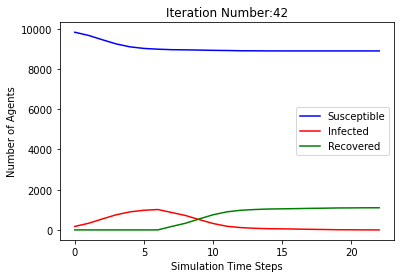

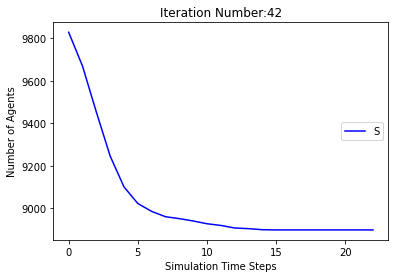

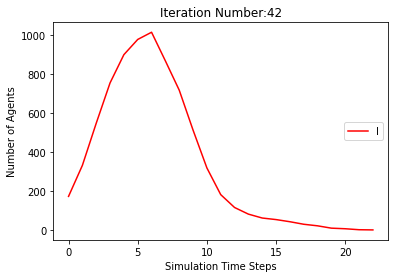

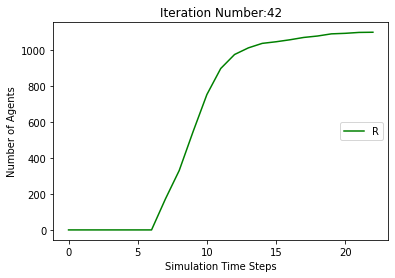

[9828, 9659, 9441, 9220, 9092, 9017, 8983, 8964, 8956, 8950, 8947, 8937, 8931, 8929, 8927, 8926, 8922, 8919, 8918, 8917, 8917, 8917, 8917, 8917, 8917, 8917, 8917]
[172, 341, 559, 780, 908, 983, 1017, 864, 703, 491, 273, 155, 86, 54, 37, 30, 28, 28, 19, 14, 12, 10, 9, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 341, 559, 780, 908, 983, 1017, 1036, 1044, 1050, 1053, 1063, 1069, 1071, 1073, 1074, 1078, 1081, 1082, 1083]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 89

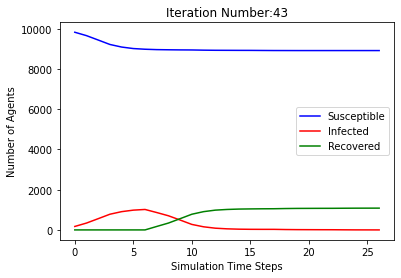

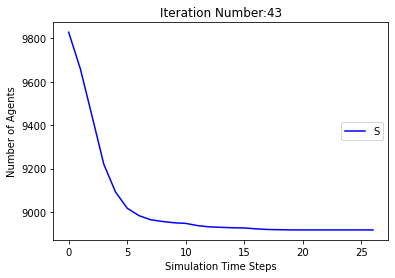

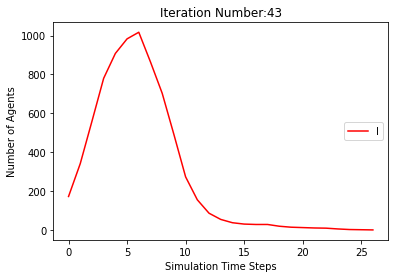

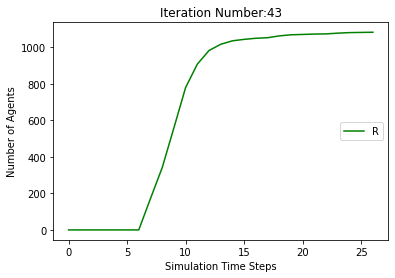

[9828, 9663, 9452, 9249, 9104, 9021, 8994, 8970, 8957, 8939, 8923, 8914, 8907, 8903, 8903, 8903, 8903, 8903, 8903, 8902, 8902, 8902, 8902, 8902, 8902, 8902, 8902]
[172, 337, 548, 751, 896, 979, 1006, 858, 706, 513, 326, 190, 114, 91, 67, 54, 36, 20, 11, 5, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 337, 548, 751, 896, 979, 1006, 1030, 1043, 1061, 1077, 1086, 1093, 1097, 1097, 1097, 1097, 1097, 1097, 1098]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952

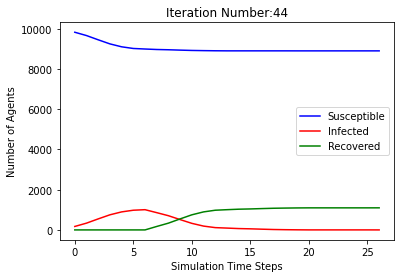

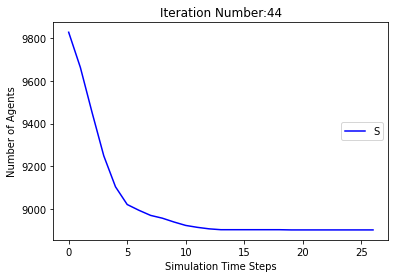

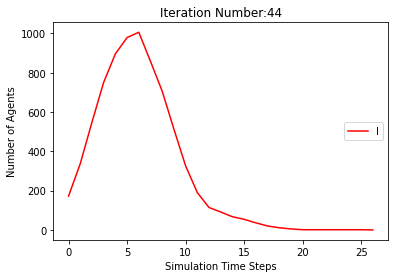

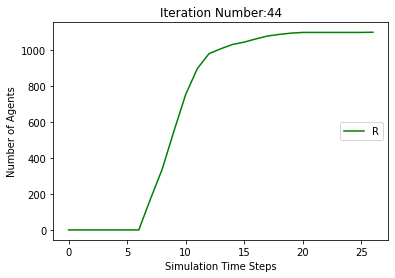

[9828, 9644, 9414, 9215, 9087, 9019, 8977, 8965, 8955, 8946, 8939, 8932, 8929, 8929, 8928, 8925, 8924, 8923, 8922, 8921, 8919, 8918, 8918, 8917, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[172, 356, 586, 785, 913, 981, 1023, 863, 689, 468, 276, 155, 90, 48, 37, 30, 22, 16, 10, 8, 10, 10, 7, 7, 7, 6, 5, 3, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 356, 586, 785, 913, 981, 1023, 1035, 1045, 1054, 1061, 1068, 1071, 1071, 1072, 1075, 1076, 1077, 1078, 1079, 1081, 1082, 1082, 1083, 1084]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 88

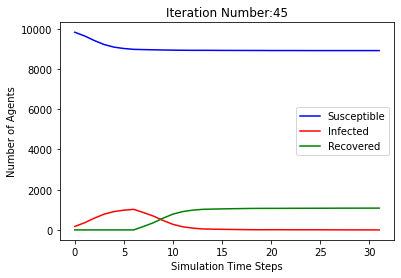

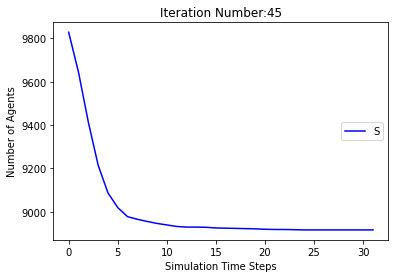

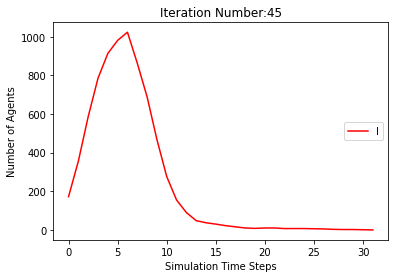

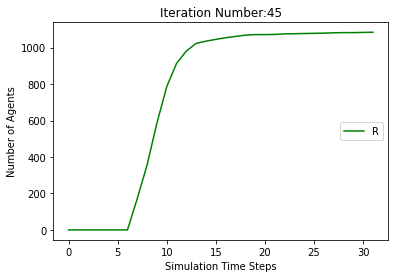

[9828, 9678, 9467, 9263, 9137, 9070, 9025, 8995, 8979, 8963, 8948, 8933, 8922, 8920, 8919, 8917, 8915, 8915, 8915, 8915, 8915, 8915, 8915, 8915]
[172, 322, 533, 737, 863, 930, 975, 833, 699, 504, 315, 204, 148, 105, 76, 62, 48, 33, 18, 7, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 322, 533, 737, 863, 930, 975, 1005, 1021, 1037, 1052, 1067, 1078, 1080, 1081, 1083, 1085]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 89

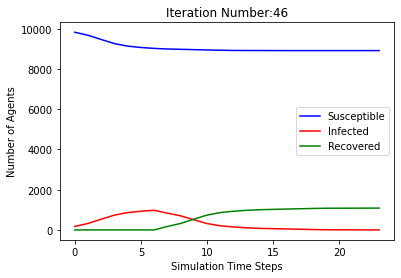

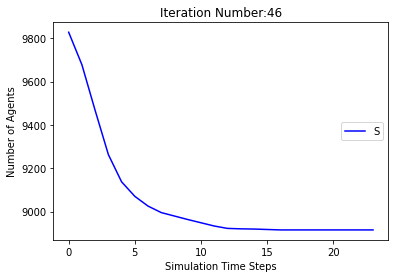

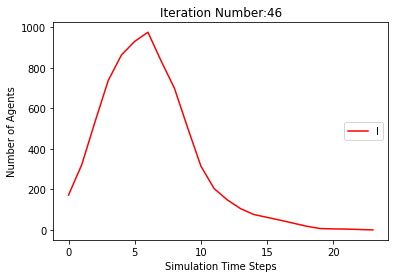

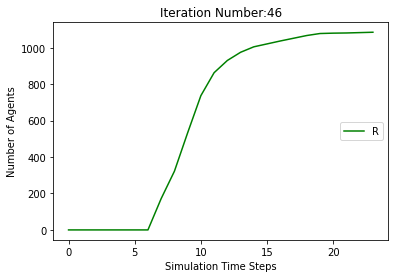

[9828, 9670, 9439, 9211, 9072, 9019, 8990, 8979, 8968, 8954, 8942, 8929, 8925, 8921, 8916, 8910, 8904, 8900, 8898, 8897, 8895, 8894, 8894, 8894, 8894, 8894, 8894, 8894, 8894]
[172, 330, 561, 789, 928, 981, 1010, 849, 702, 485, 269, 143, 94, 69, 63, 58, 50, 42, 31, 28, 26, 22, 16, 10, 6, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 561, 789, 928, 981, 1010, 1021, 1032, 1046, 1058, 1071, 1075, 1079, 1084, 1090, 1096, 1100, 1102, 1103, 1105, 1106]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 

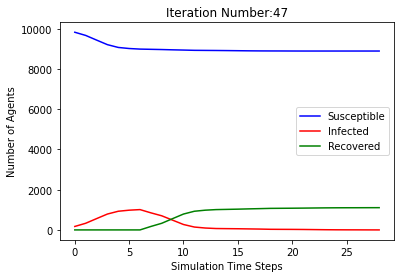

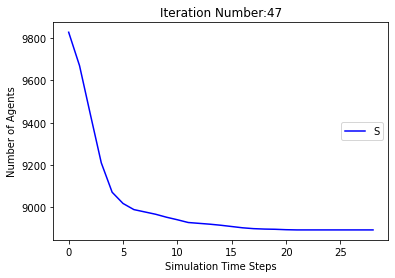

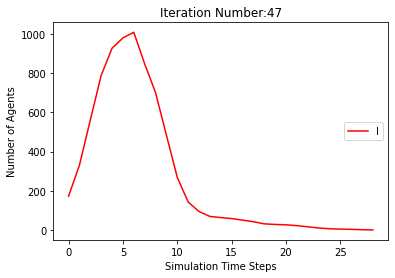

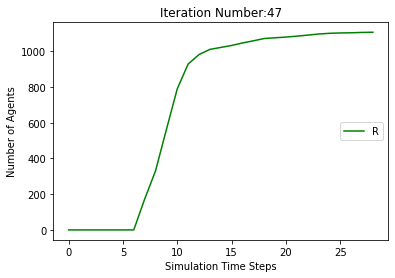

[9828, 9661, 9471, 9258, 9130, 9051, 9001, 8979, 8963, 8950, 8942, 8932, 8921, 8916, 8914, 8912, 8910, 8907, 8907, 8905, 8904, 8904, 8903, 8903, 8903, 8903, 8903, 8903, 8903, 8903]
[172, 339, 529, 742, 870, 949, 999, 849, 698, 521, 316, 198, 130, 85, 65, 51, 40, 35, 25, 16, 12, 10, 9, 7, 4, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 339, 529, 742, 870, 949, 999, 1021, 1037, 1050, 1058, 1068, 1079, 1084, 1086, 1088, 1090, 1093, 1093, 1095, 1096, 1096, 1097]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 

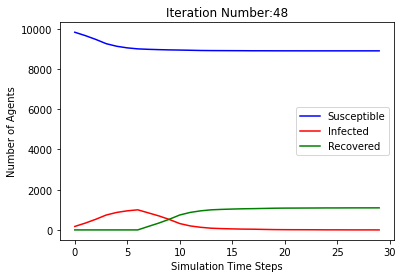

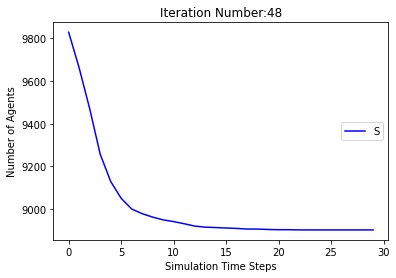

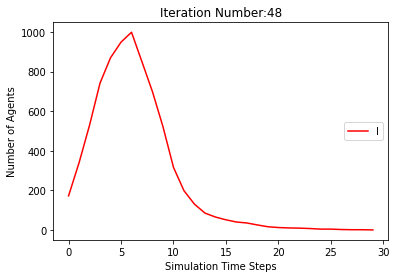

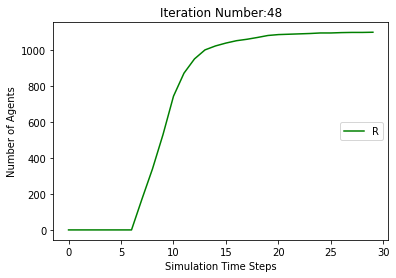

[9828, 9660, 9447, 9226, 9074, 9010, 8966, 8936, 8924, 8912, 8905, 8894, 8887, 8879, 8875, 8872, 8871, 8870, 8870, 8870, 8870, 8870, 8870, 8870, 8870]
[172, 340, 553, 774, 926, 990, 1034, 892, 736, 535, 321, 180, 123, 87, 61, 52, 41, 35, 24, 17, 9, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 340, 553, 774, 926, 990, 1034, 1064, 1076, 1088, 1095, 1106, 1113, 1121, 1125, 1128, 1129, 1130]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 892

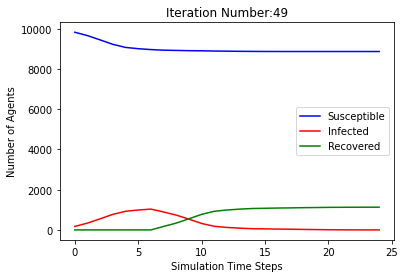

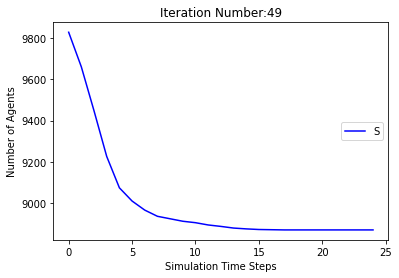

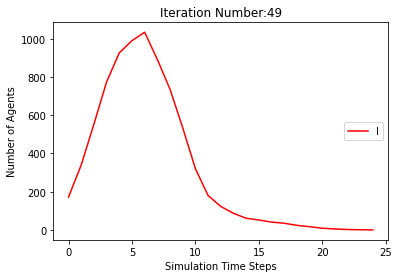

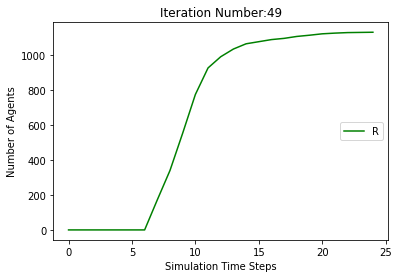

[9828, 9680, 9450, 9240, 9092, 9013, 8977, 8963, 8951, 8941, 8936, 8933, 8933, 8932, 8931, 8931, 8931, 8930, 8930, 8930, 8930, 8930, 8930, 8930, 8930]
[172, 320, 550, 760, 908, 987, 1023, 865, 729, 509, 304, 159, 80, 45, 32, 20, 10, 6, 3, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 320, 550, 760, 908, 987, 1023, 1037, 1049, 1059, 1064, 1067, 1067, 1068, 1069, 1069, 1069, 1070]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8

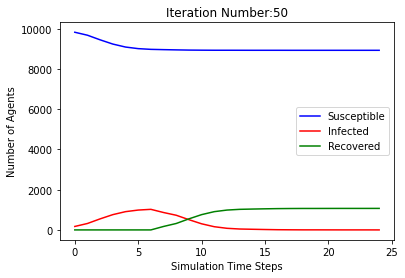

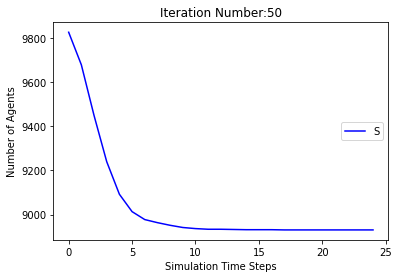

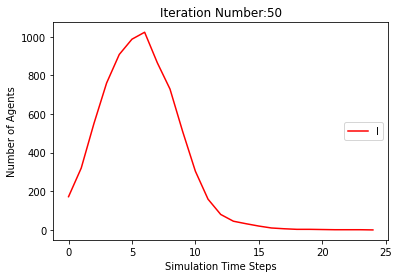

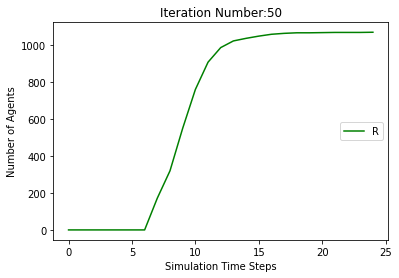

[9828, 9667, 9434, 9244, 9120, 9049, 9012, 8991, 8977, 8957, 8940, 8932, 8926, 8924, 8923, 8923, 8923, 8923, 8922, 8920, 8920, 8920, 8920, 8920, 8920, 8920, 8920]
[172, 333, 566, 756, 880, 951, 988, 837, 690, 477, 304, 188, 123, 88, 68, 54, 34, 17, 10, 6, 4, 3, 3, 3, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 333, 566, 756, 880, 951, 988, 1009, 1023, 1043, 1060, 1068, 1074, 1076, 1077, 1077, 1077, 1077, 1078, 1080]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 

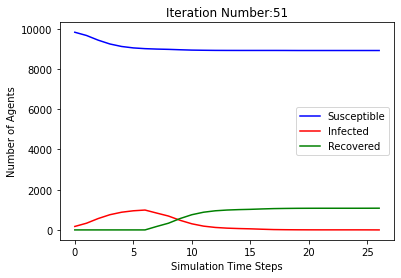

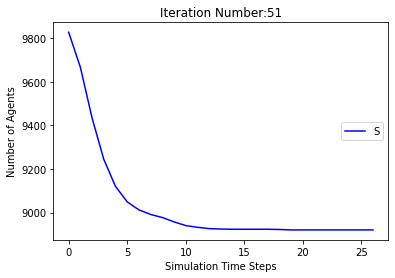

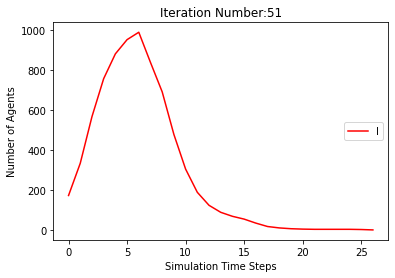

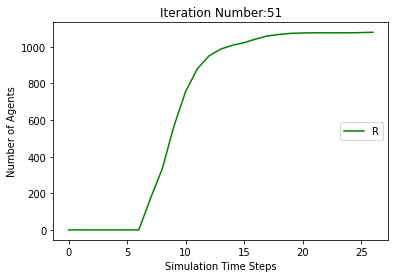

[9828, 9677, 9451, 9224, 9082, 9010, 8977, 8962, 8946, 8929, 8918, 8915, 8914, 8912, 8910, 8910, 8910, 8910, 8910, 8910, 8910, 8910]
[172, 323, 549, 776, 918, 990, 1023, 866, 731, 522, 306, 167, 96, 65, 52, 36, 19, 8, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 323, 549, 776, 918, 990, 1023, 1038, 1054, 1071, 1082, 1085, 1086, 1088, 1090]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [98

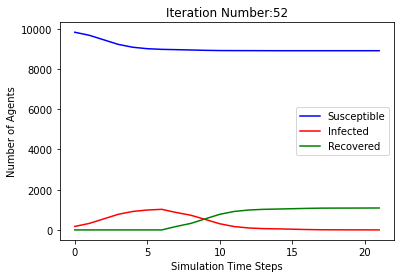

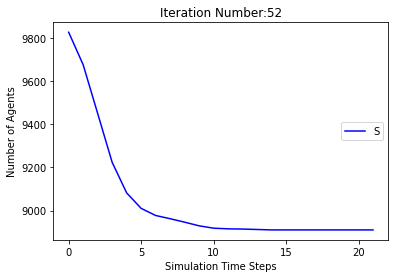

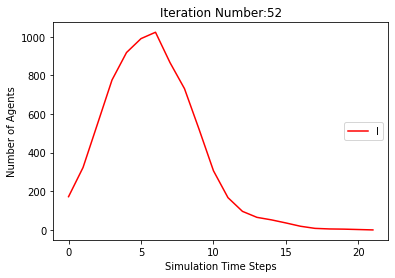

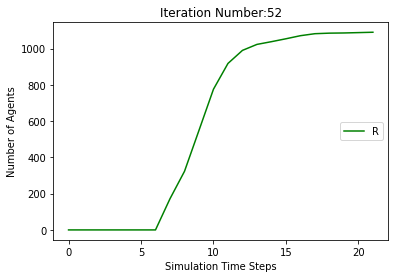

[9828, 9676, 9447, 9238, 9106, 9027, 8976, 8952, 8934, 8927, 8917, 8911, 8904, 8902, 8897, 8892, 8890, 8888, 8884, 8881, 8879, 8879, 8879, 8879, 8879, 8879, 8879, 8879]
[172, 324, 553, 762, 894, 973, 1024, 876, 742, 520, 321, 195, 123, 74, 55, 42, 37, 29, 27, 23, 23, 18, 13, 11, 9, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 324, 553, 762, 894, 973, 1024, 1048, 1066, 1073, 1083, 1089, 1096, 1098, 1103, 1108, 1110, 1112, 1116, 1119, 1121]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 89

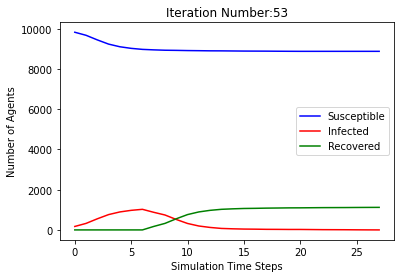

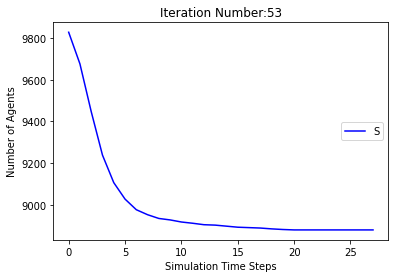

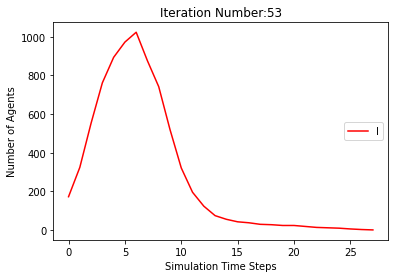

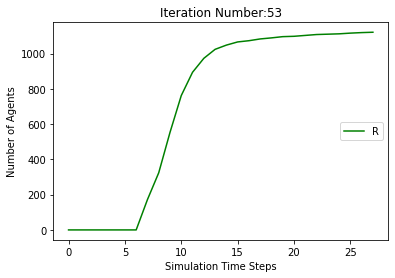

[9828, 9678, 9443, 9245, 9096, 9025, 8996, 8981, 8966, 8950, 8938, 8928, 8918, 8916, 8916, 8916, 8915, 8914, 8912, 8912, 8912, 8912, 8912, 8912, 8912, 8912]
[172, 322, 557, 755, 904, 975, 1004, 847, 712, 493, 307, 168, 107, 80, 65, 50, 35, 24, 16, 6, 4, 4, 4, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 322, 557, 755, 904, 975, 1004, 1019, 1034, 1050, 1062, 1072, 1082, 1084, 1084, 1084, 1085, 1086, 1088]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8

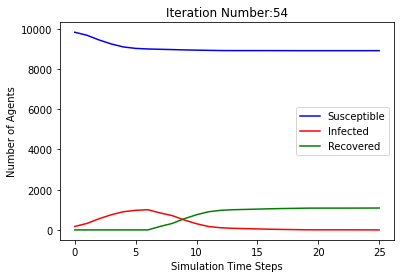

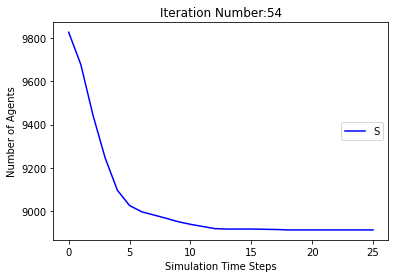

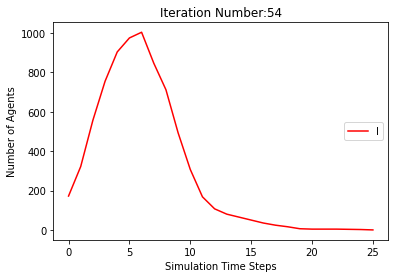

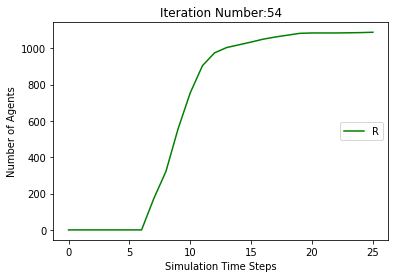

[9828, 9655, 9449, 9226, 9087, 9017, 8974, 8954, 8943, 8930, 8914, 8901, 8894, 8891, 8889, 8888, 8888, 8888, 8888, 8888, 8888, 8888, 8888]
[172, 345, 551, 774, 913, 983, 1026, 874, 712, 519, 312, 186, 123, 83, 65, 55, 42, 26, 13, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 345, 551, 774, 913, 983, 1026, 1046, 1057, 1070, 1086, 1099, 1106, 1109, 1111, 1112]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923

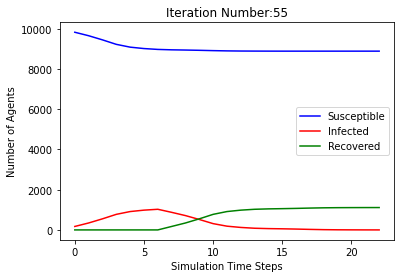

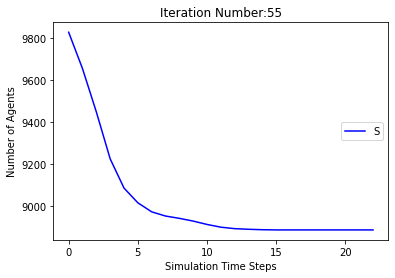

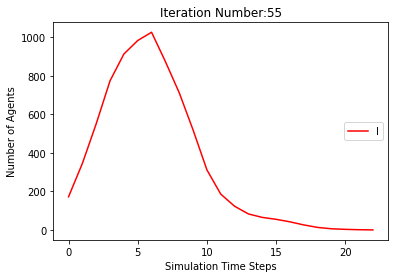

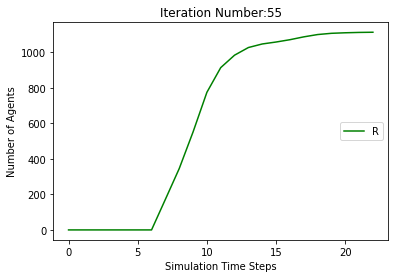

[9828, 9654, 9448, 9245, 9084, 9002, 8969, 8957, 8948, 8942, 8937, 8937, 8935, 8932, 8929, 8927, 8925, 8924, 8924, 8924, 8924, 8924, 8924, 8924, 8924]
[172, 346, 552, 755, 916, 998, 1031, 871, 706, 506, 308, 147, 67, 37, 28, 21, 17, 13, 13, 11, 8, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 346, 552, 755, 916, 998, 1031, 1043, 1052, 1058, 1063, 1063, 1065, 1068, 1071, 1073, 1075, 1076]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923

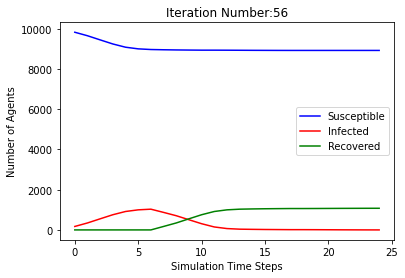

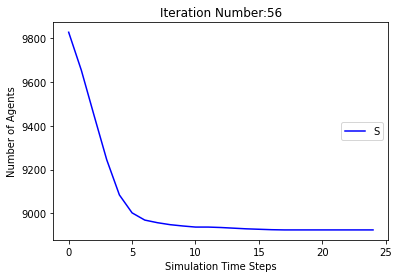

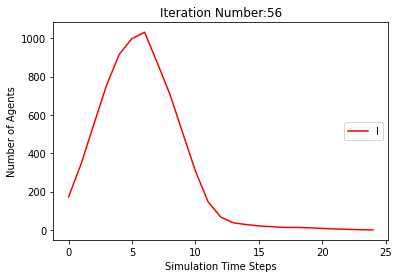

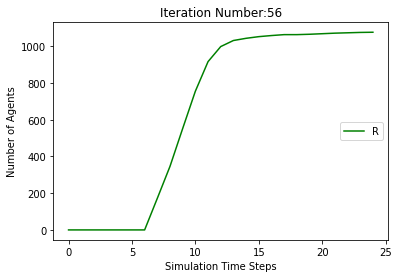

[9828, 9650, 9436, 9222, 9095, 9025, 8994, 8977, 8971, 8964, 8958, 8953, 8948, 8944, 8943, 8941, 8940, 8938, 8936, 8934, 8934, 8934, 8934, 8934, 8934, 8934, 8934]
[172, 350, 564, 778, 905, 975, 1006, 851, 679, 472, 264, 142, 77, 50, 34, 30, 24, 20, 17, 14, 10, 9, 7, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 350, 564, 778, 905, 975, 1006, 1023, 1029, 1036, 1042, 1047, 1052, 1056, 1057, 1059, 1060, 1062, 1064, 1066]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

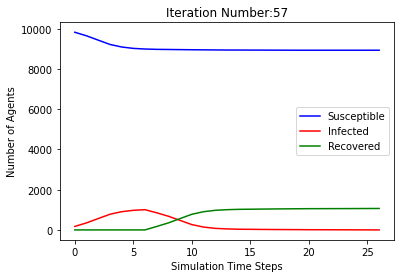

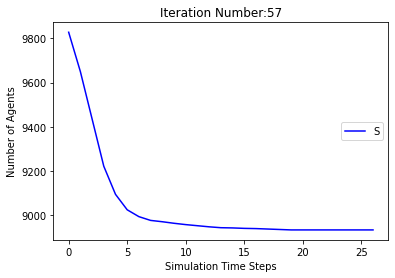

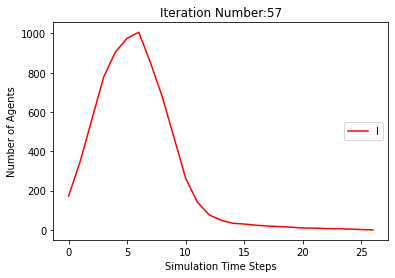

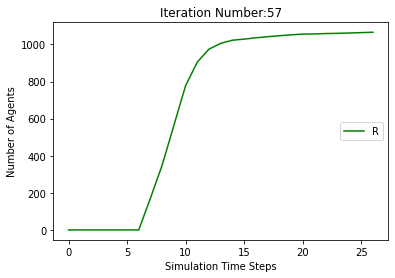

[9828, 9666, 9464, 9266, 9117, 9031, 8995, 8973, 8961, 8949, 8940, 8938, 8931, 8927, 8925, 8924, 8923, 8921, 8919, 8918, 8918, 8918, 8918, 8918, 8918, 8918, 8918]
[172, 334, 536, 734, 883, 969, 1005, 855, 705, 515, 326, 179, 100, 68, 48, 37, 26, 19, 19, 13, 9, 7, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 334, 536, 734, 883, 969, 1005, 1027, 1039, 1051, 1060, 1062, 1069, 1073, 1075, 1076, 1077, 1079, 1081, 1082]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

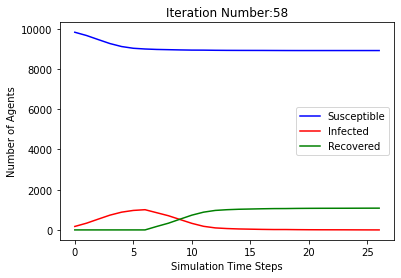

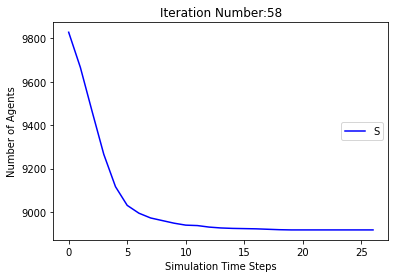

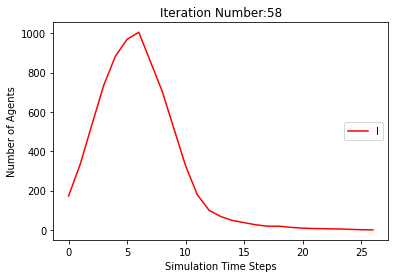

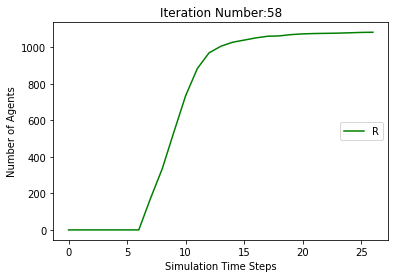

[9828, 9672, 9464, 9276, 9124, 9030, 8980, 8960, 8942, 8926, 8920, 8915, 8912, 8911, 8911, 8911, 8911, 8911, 8911, 8911, 8911]
[172, 328, 536, 724, 876, 970, 1020, 868, 730, 538, 356, 209, 118, 69, 49, 31, 15, 9, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 328, 536, 724, 876, 970, 1020, 1040, 1058, 1074, 1080, 1085, 1088, 1089]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459

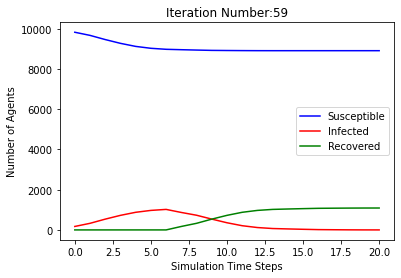

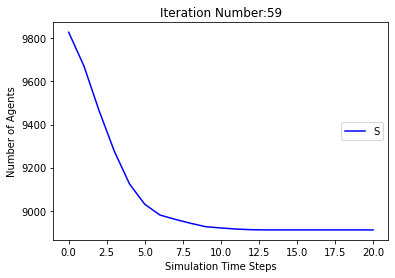

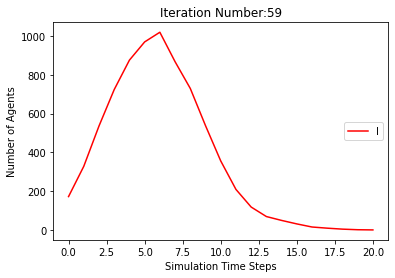

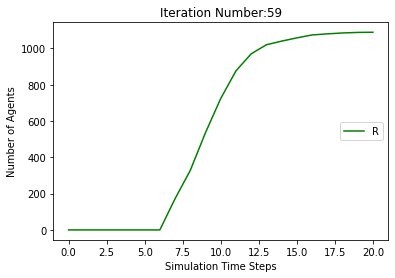

[9828, 9651, 9440, 9241, 9104, 9040, 9003, 8988, 8977, 8964, 8951, 8942, 8937, 8937, 8937, 8936, 8935, 8933, 8933, 8933, 8933, 8933, 8933, 8933, 8933]
[172, 349, 560, 759, 896, 960, 997, 840, 674, 476, 290, 162, 103, 66, 51, 41, 29, 18, 9, 4, 4, 4, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 349, 560, 759, 896, 960, 997, 1012, 1023, 1036, 1049, 1058, 1063, 1063, 1063, 1064, 1065, 1067]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8

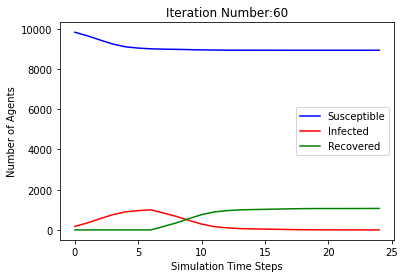

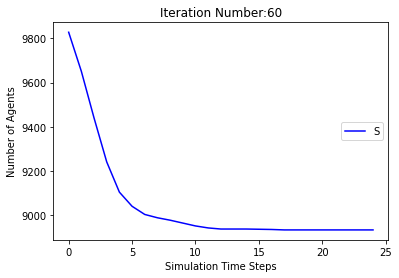

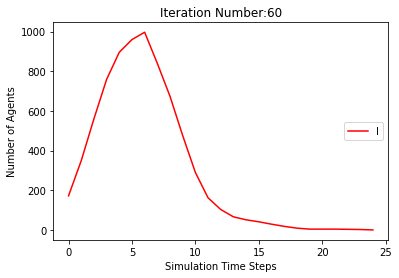

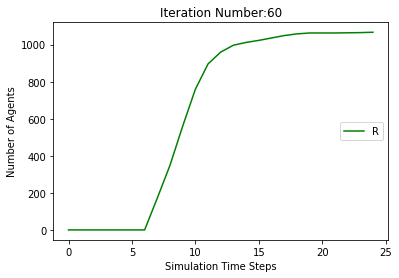

[9828, 9662, 9463, 9272, 9131, 9046, 9006, 8980, 8965, 8952, 8937, 8928, 8920, 8911, 8906, 8902, 8901, 8899, 8899, 8899, 8899, 8899, 8899, 8898, 8898, 8898, 8898, 8898, 8898, 8898, 8898]
[172, 338, 537, 728, 869, 954, 994, 848, 697, 511, 335, 203, 126, 95, 74, 63, 51, 38, 29, 21, 12, 7, 3, 3, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 338, 537, 728, 869, 954, 994, 1020, 1035, 1048, 1063, 1072, 1080, 1089, 1094, 1098, 1099, 1101, 1101, 1101, 1101, 1101, 1101, 1102]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668

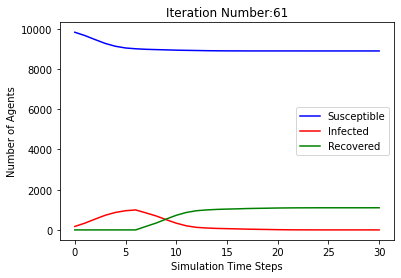

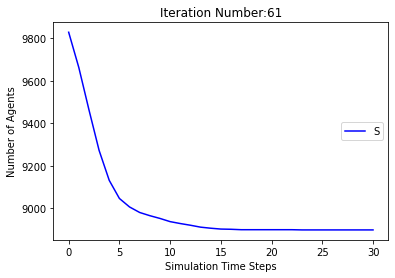

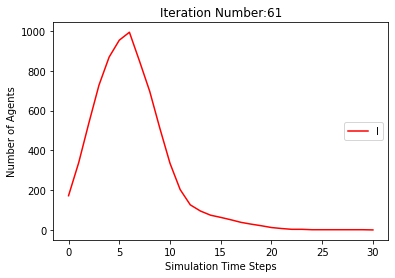

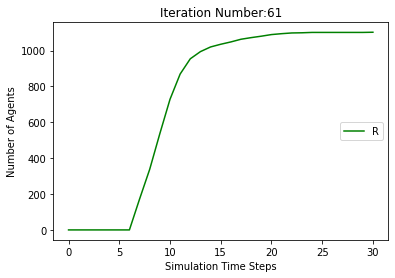

[9828, 9651, 9427, 9204, 9073, 9019, 8993, 8973, 8964, 8949, 8942, 8936, 8934, 8932, 8929, 8926, 8924, 8922, 8922, 8922, 8922, 8922, 8922, 8922, 8922]
[172, 349, 573, 796, 927, 981, 1007, 855, 687, 478, 262, 137, 85, 61, 44, 38, 25, 20, 14, 12, 10, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 349, 573, 796, 927, 981, 1007, 1027, 1036, 1051, 1058, 1064, 1066, 1068, 1071, 1074, 1076, 1078]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 892

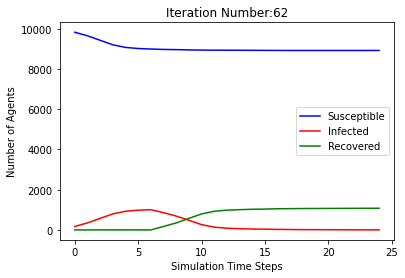

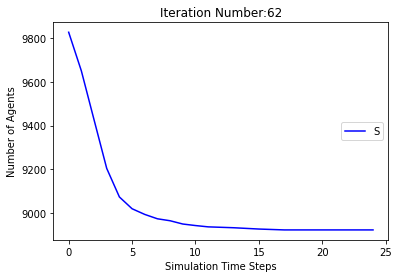

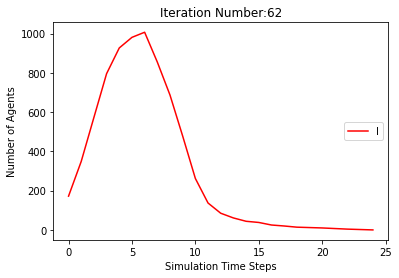

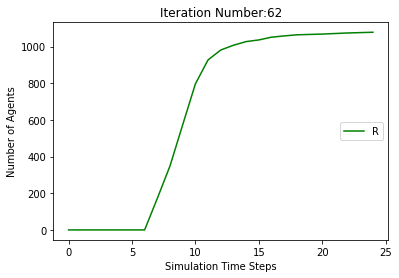

[9828, 9663, 9449, 9249, 9103, 9027, 9000, 8986, 8977, 8967, 8960, 8955, 8952, 8949, 8949, 8949, 8949, 8949, 8949, 8949, 8949]
[172, 337, 551, 751, 897, 973, 1000, 842, 686, 482, 289, 148, 75, 51, 37, 28, 18, 11, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 337, 551, 751, 897, 973, 1000, 1014, 1023, 1033, 1040, 1045, 1048, 1051]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459

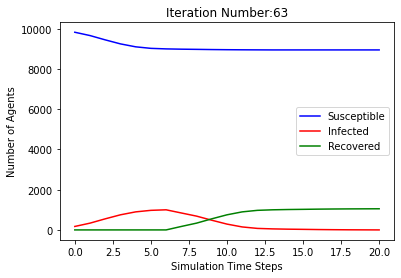

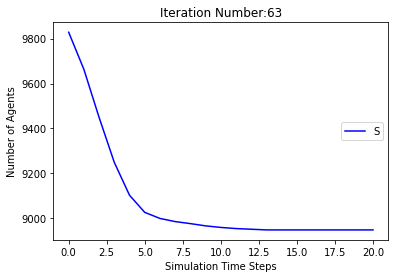

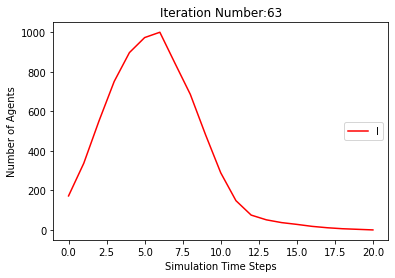

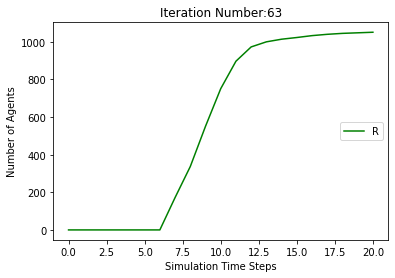

[9828, 9661, 9457, 9240, 9098, 9028, 8992, 8975, 8968, 8956, 8949, 8945, 8943, 8942, 8941, 8941, 8941, 8941, 8941, 8941, 8941, 8941]
[172, 339, 543, 760, 902, 972, 1008, 853, 693, 501, 291, 153, 85, 50, 34, 27, 15, 8, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 339, 543, 760, 902, 972, 1008, 1025, 1032, 1044, 1051, 1055, 1057, 1058, 1059]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [98

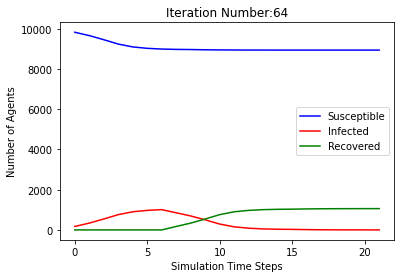

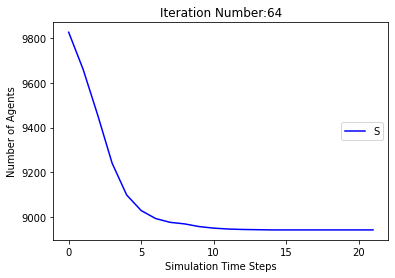

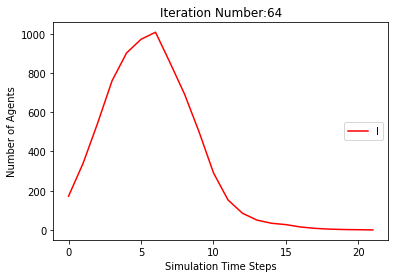

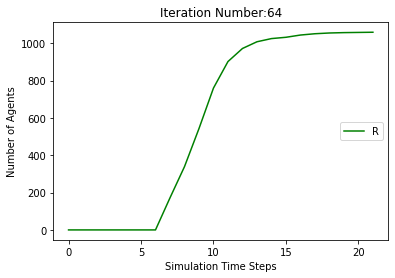

[9828, 9671, 9462, 9263, 9143, 9063, 9015, 8995, 8987, 8980, 8972, 8963, 8957, 8949, 8943, 8940, 8937, 8935, 8934, 8934, 8931, 8930, 8928, 8927, 8927, 8927, 8927, 8927, 8927, 8927, 8927]
[172, 329, 538, 737, 857, 937, 985, 833, 684, 482, 291, 180, 106, 66, 52, 47, 43, 37, 29, 23, 18, 13, 12, 10, 8, 7, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 329, 538, 737, 857, 937, 985, 1005, 1013, 1020, 1028, 1037, 1043, 1051, 1057, 1060, 1063, 1065, 1066, 1066, 1069, 1070, 1072, 1073]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9

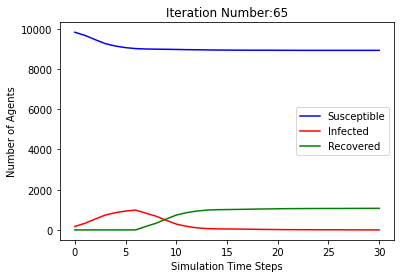

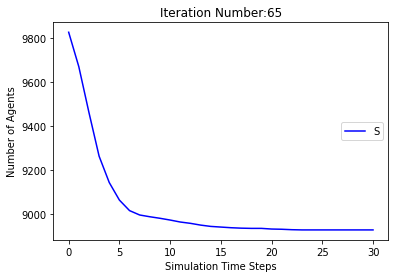

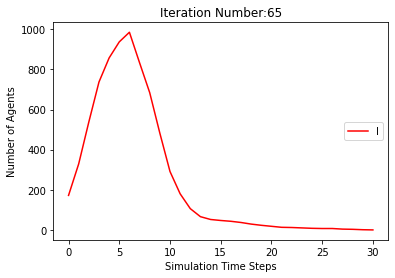

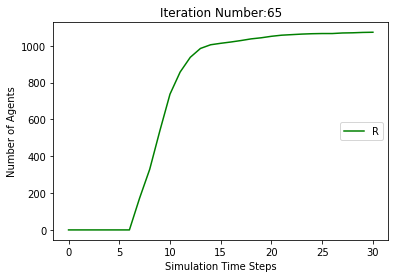

[9828, 9660, 9435, 9248, 9114, 9040, 9004, 8987, 8974, 8962, 8948, 8943, 8939, 8935, 8934, 8934, 8934, 8934, 8934, 8934, 8934, 8934]
[172, 340, 565, 752, 886, 960, 996, 841, 686, 473, 300, 171, 101, 69, 53, 40, 28, 14, 9, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 340, 565, 752, 886, 960, 996, 1013, 1026, 1038, 1052, 1057, 1061, 1065, 1066]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [98

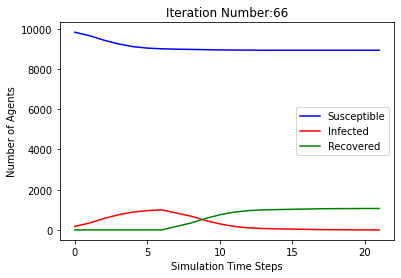

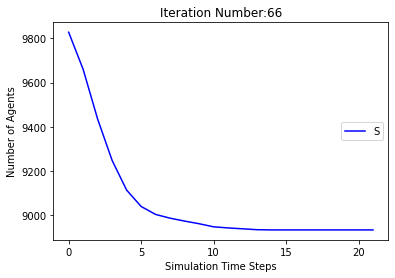

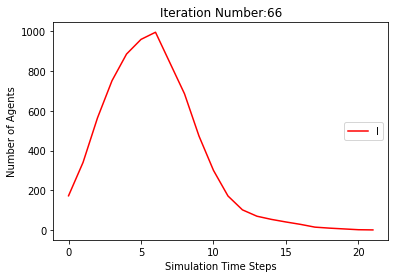

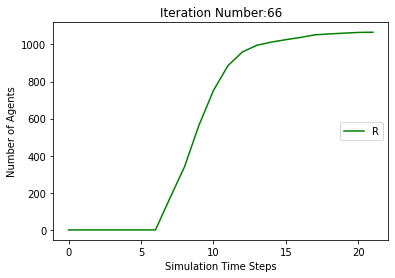

[9828, 9643, 9420, 9224, 9092, 9021, 8975, 8952, 8935, 8926, 8916, 8913, 8912, 8911, 8908, 8902, 8900, 8900, 8900, 8900, 8900, 8900, 8900, 8900]
[172, 357, 580, 776, 908, 979, 1025, 876, 708, 494, 308, 179, 109, 64, 44, 33, 26, 16, 13, 12, 11, 8, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 357, 580, 776, 908, 979, 1025, 1048, 1065, 1074, 1084, 1087, 1088, 1089, 1092, 1098, 1100]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923,

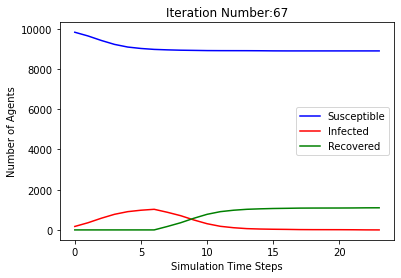

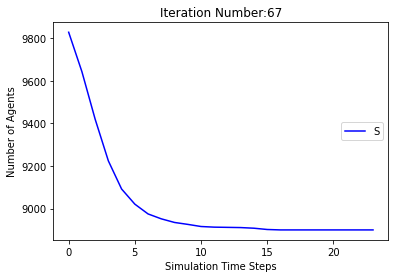

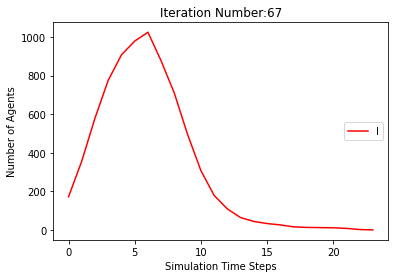

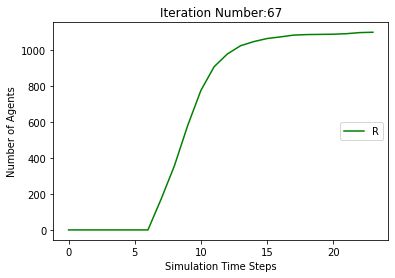

[9828, 9660, 9451, 9243, 9104, 9010, 8972, 8955, 8939, 8924, 8916, 8906, 8897, 8894, 8892, 8890, 8890, 8890, 8890, 8890, 8890, 8890, 8890]
[172, 340, 549, 757, 896, 990, 1028, 873, 721, 527, 327, 198, 113, 78, 63, 49, 34, 26, 16, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 340, 549, 757, 896, 990, 1028, 1045, 1061, 1076, 1084, 1094, 1103, 1106, 1108, 1110]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923

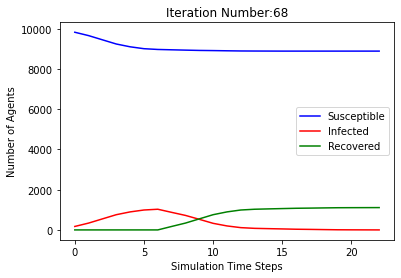

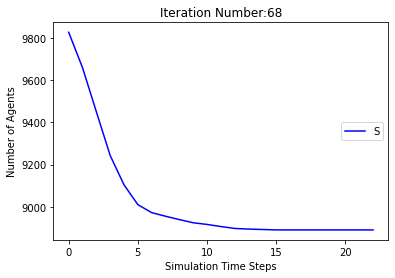

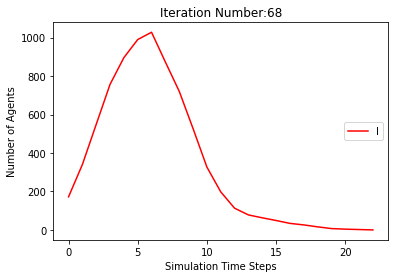

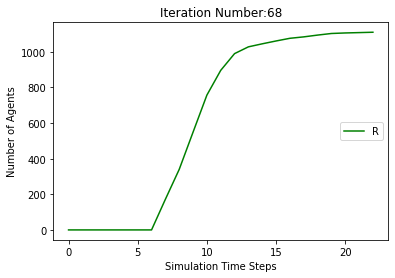

[9828, 9648, 9416, 9227, 9102, 9030, 9001, 8983, 8980, 8976, 8973, 8968, 8963, 8961, 8961, 8961, 8961, 8961, 8961, 8961, 8961]
[172, 352, 584, 773, 898, 970, 999, 845, 668, 440, 254, 134, 67, 40, 22, 19, 15, 12, 7, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 352, 584, 773, 898, 970, 999, 1017, 1020, 1024, 1027, 1032, 1037, 1039]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459, 

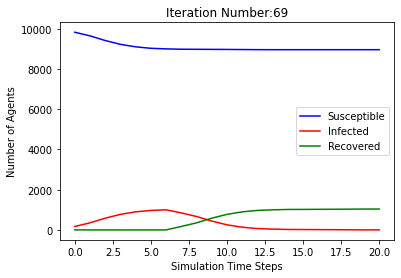

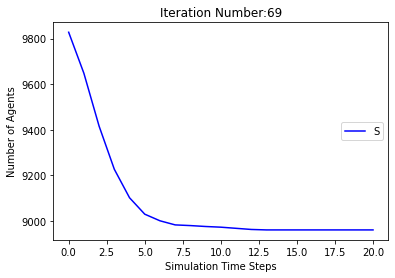

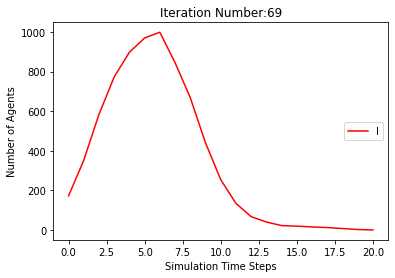

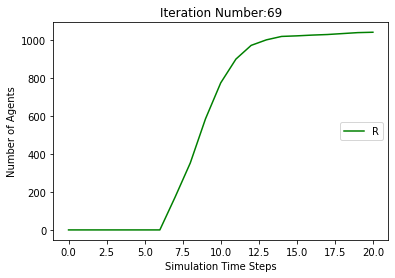

[9828, 9656, 9446, 9245, 9097, 9030, 8997, 8978, 8967, 8959, 8946, 8940, 8937, 8934, 8933, 8927, 8924, 8919, 8918, 8917, 8917, 8917, 8917, 8917, 8917, 8917, 8917]
[172, 344, 554, 755, 903, 970, 1003, 850, 689, 487, 299, 157, 93, 63, 45, 40, 35, 27, 22, 20, 17, 16, 10, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 344, 554, 755, 903, 970, 1003, 1022, 1033, 1041, 1054, 1060, 1063, 1066, 1067, 1073, 1076, 1081, 1082, 1083]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8

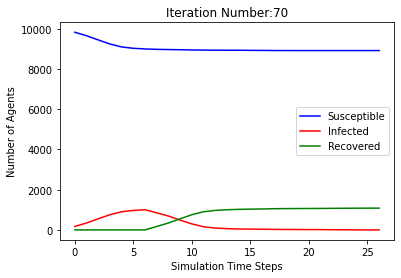

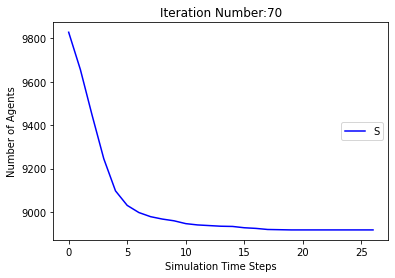

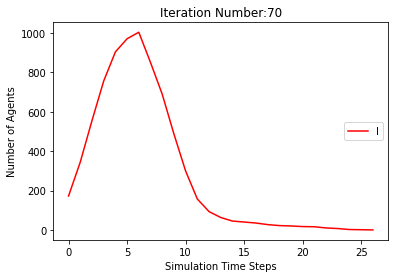

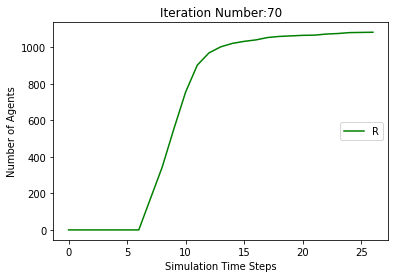

[9828, 9671, 9459, 9241, 9087, 9021, 8982, 8958, 8940, 8921, 8905, 8898, 8894, 8890, 8886, 8884, 8880, 8878, 8877, 8877, 8877, 8877, 8877, 8877, 8877, 8877]
[172, 329, 541, 759, 913, 979, 1018, 870, 731, 538, 336, 189, 127, 92, 72, 56, 41, 27, 21, 17, 13, 9, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 329, 541, 759, 913, 979, 1018, 1042, 1060, 1079, 1095, 1102, 1106, 1110, 1114, 1116, 1120, 1122, 1123]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934,

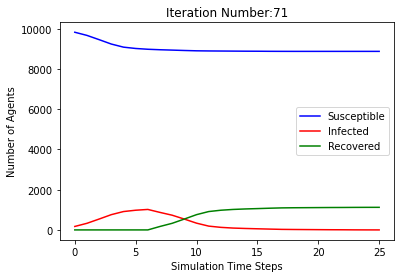

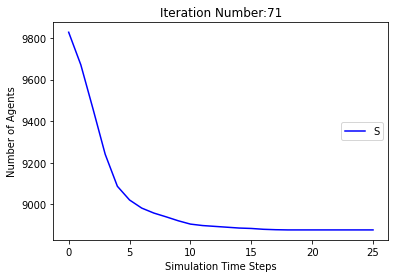

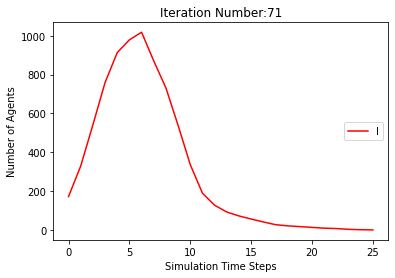

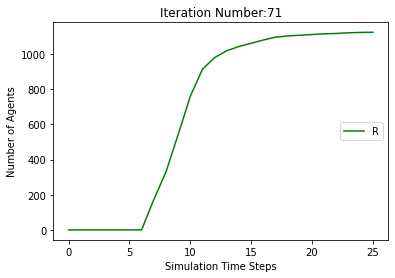

[9828, 9662, 9445, 9254, 9112, 9037, 9000, 8979, 8967, 8960, 8937, 8924, 8920, 8920, 8917, 8915, 8913, 8913, 8913, 8913, 8913, 8913, 8913, 8913]
[172, 338, 555, 746, 888, 963, 1000, 849, 695, 485, 317, 188, 117, 80, 62, 52, 47, 24, 11, 7, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 338, 555, 746, 888, 963, 1000, 1021, 1033, 1040, 1063, 1076, 1080, 1080, 1083, 1085, 1087]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8

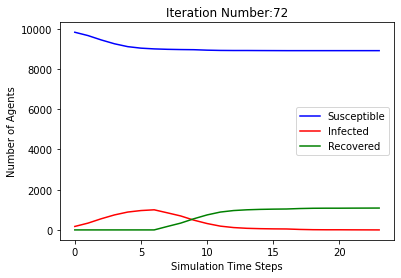

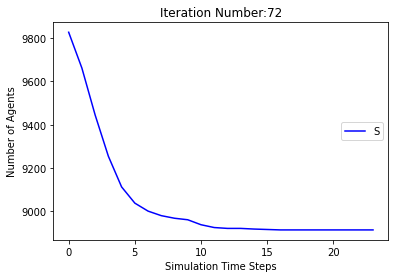

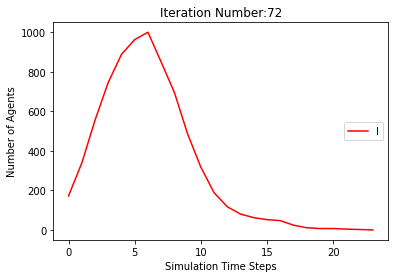

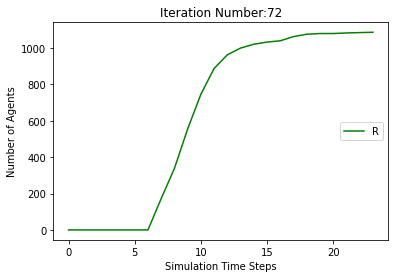

[9828, 9649, 9417, 9213, 9073, 9022, 8992, 8967, 8956, 8947, 8944, 8936, 8928, 8920, 8913, 8912, 8910, 8910, 8909, 8908, 8908, 8908, 8908, 8908, 8908, 8908, 8908]
[172, 351, 583, 787, 927, 978, 1008, 861, 693, 470, 269, 137, 94, 72, 54, 44, 37, 34, 27, 20, 12, 5, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 351, 583, 787, 927, 978, 1008, 1033, 1044, 1053, 1056, 1064, 1072, 1080, 1087, 1088, 1090, 1090, 1091, 1092]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

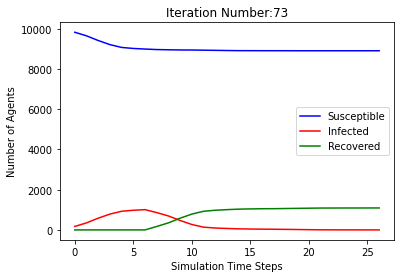

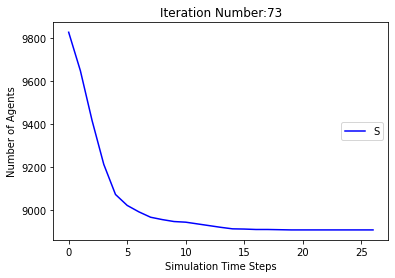

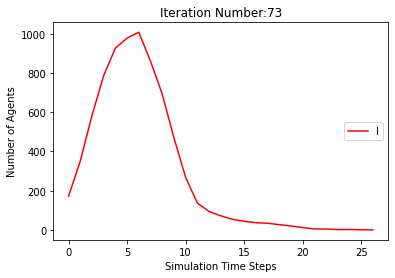

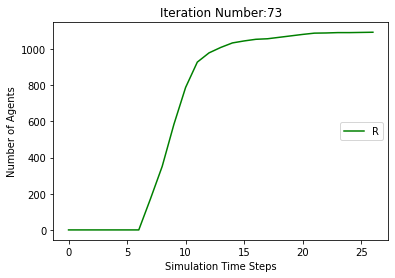

[9828, 9663, 9438, 9228, 9083, 9017, 8983, 8958, 8943, 8932, 8926, 8922, 8920, 8919, 8917, 8916, 8915, 8915, 8915, 8915, 8915, 8915, 8915, 8915]
[172, 337, 562, 772, 917, 983, 1017, 870, 720, 506, 302, 161, 97, 64, 41, 27, 17, 11, 7, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 337, 562, 772, 917, 983, 1017, 1042, 1057, 1068, 1074, 1078, 1080, 1081, 1083, 1084, 1085]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 892

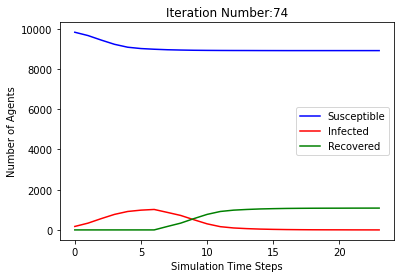

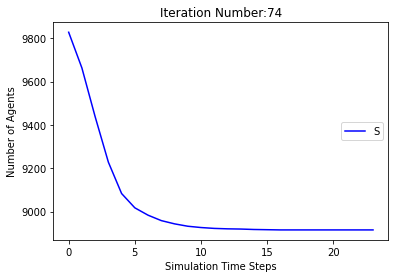

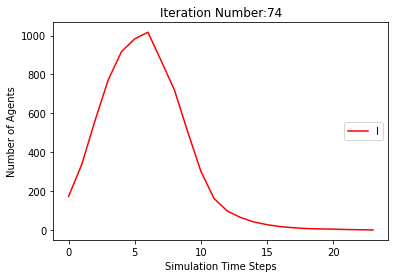

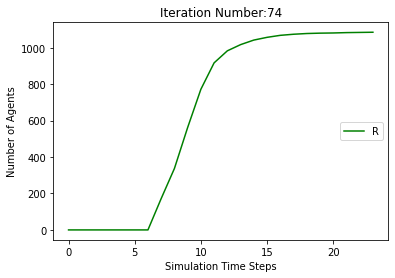

[9828, 9657, 9449, 9235, 9093, 9018, 8986, 8970, 8964, 8961, 8954, 8945, 8935, 8931, 8931, 8931, 8931, 8931, 8931, 8931, 8931]
[172, 343, 551, 765, 907, 982, 1014, 858, 693, 488, 281, 148, 83, 55, 39, 33, 30, 23, 14, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 343, 551, 765, 907, 982, 1014, 1030, 1036, 1039, 1046, 1055, 1065, 1069]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 945

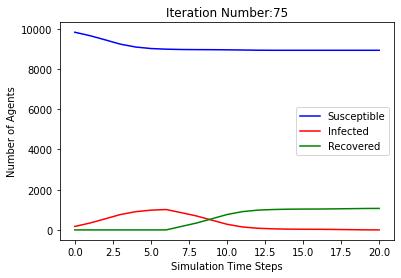

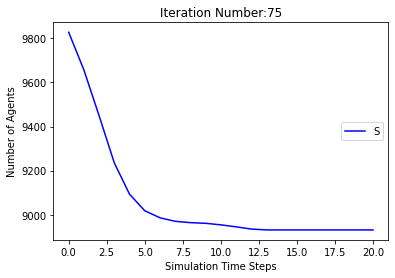

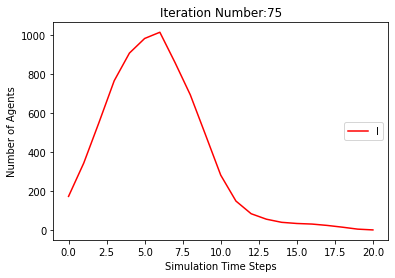

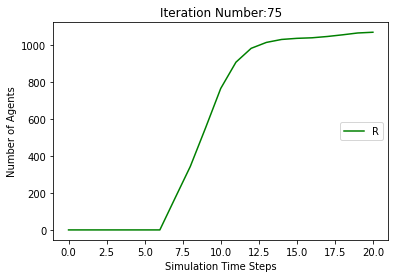

[9828, 9645, 9434, 9233, 9098, 9027, 8992, 8970, 8964, 8957, 8955, 8952, 8949, 8949, 8947, 8945, 8944, 8943, 8943, 8943, 8943, 8943, 8943, 8943, 8943]
[172, 355, 566, 767, 902, 973, 1008, 858, 681, 477, 278, 146, 78, 43, 23, 19, 13, 12, 9, 6, 6, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 355, 566, 767, 902, 973, 1008, 1030, 1036, 1043, 1045, 1048, 1051, 1051, 1053, 1055, 1056, 1057]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 

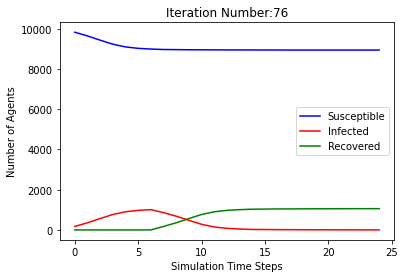

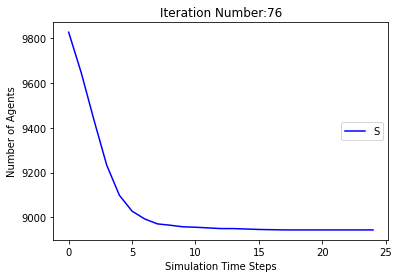

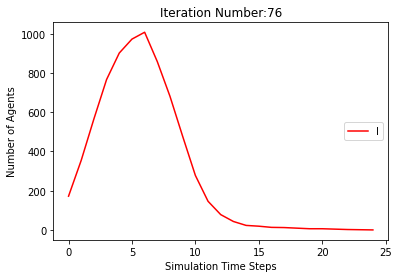

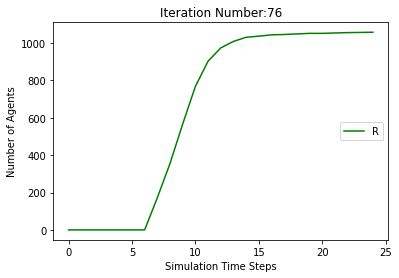

[9828, 9642, 9402, 9188, 9061, 9005, 8979, 8964, 8954, 8947, 8938, 8933, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[172, 358, 598, 812, 939, 995, 1021, 864, 688, 455, 250, 128, 76, 50, 35, 25, 18, 9, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 358, 598, 812, 939, 995, 1021, 1036, 1046, 1053, 1062, 1067, 1071]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [9828, 9650, 9459, 9274, 9126, 90

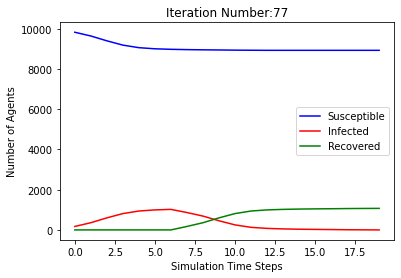

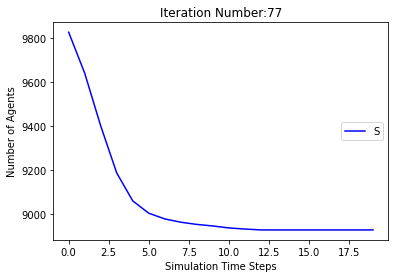

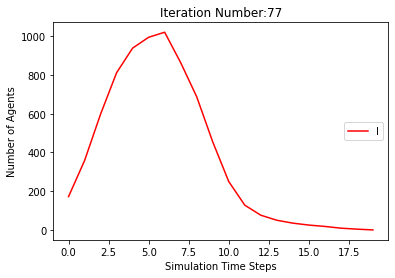

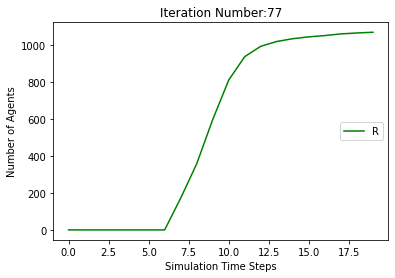

[9828, 9655, 9431, 9225, 9078, 9007, 8976, 8966, 8959, 8959, 8958, 8957, 8953, 8952, 8949, 8949, 8949, 8948, 8948, 8948, 8948, 8948, 8948, 8948, 8948]
[172, 345, 569, 775, 922, 993, 1024, 862, 696, 472, 267, 121, 54, 24, 17, 10, 10, 10, 9, 5, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 345, 569, 775, 922, 993, 1024, 1034, 1041, 1041, 1042, 1043, 1047, 1048, 1051, 1051, 1051, 1052]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 

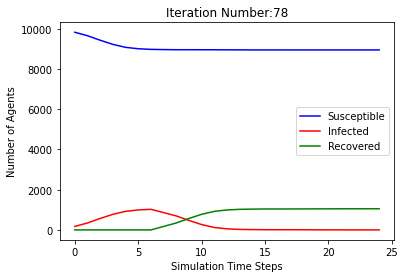

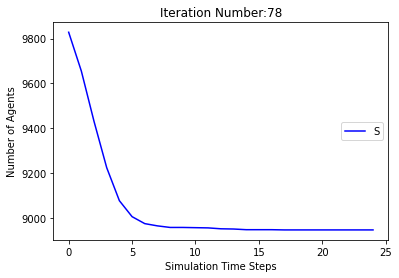

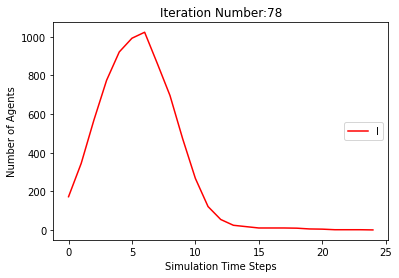

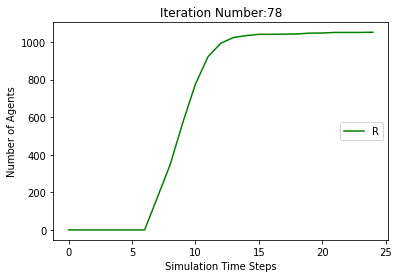

[9828, 9659, 9436, 9250, 9123, 9043, 9001, 8981, 8973, 8968, 8954, 8947, 8944, 8940, 8938, 8935, 8933, 8932, 8928, 8927, 8927, 8927, 8927, 8927, 8927, 8927, 8927]
[172, 341, 564, 750, 877, 957, 999, 847, 686, 468, 296, 176, 99, 61, 43, 38, 35, 22, 19, 17, 13, 11, 8, 6, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 341, 564, 750, 877, 957, 999, 1019, 1027, 1032, 1046, 1053, 1056, 1060, 1062, 1065, 1067, 1068, 1072, 1073]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952

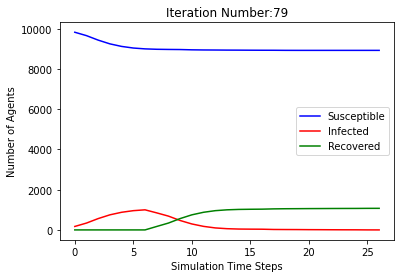

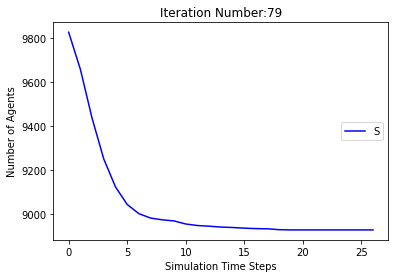

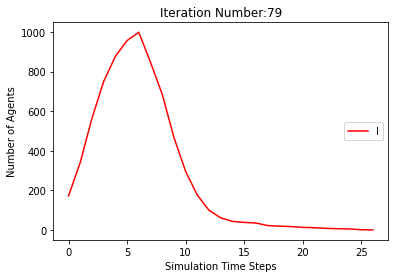

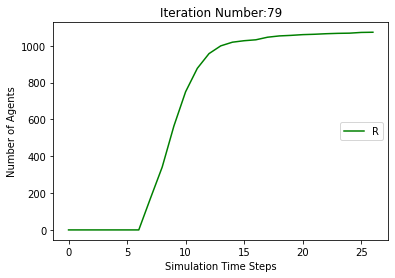

[9828, 9675, 9458, 9249, 9107, 9032, 8986, 8976, 8962, 8945, 8918, 8895, 8881, 8872, 8870, 8868, 8867, 8867, 8867, 8867, 8867, 8867, 8867, 8867]
[172, 325, 542, 751, 893, 968, 1014, 852, 713, 513, 331, 212, 151, 114, 106, 94, 78, 51, 28, 14, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 325, 542, 751, 893, 968, 1014, 1024, 1038, 1055, 1082, 1105, 1119, 1128, 1130, 1132, 1133]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923

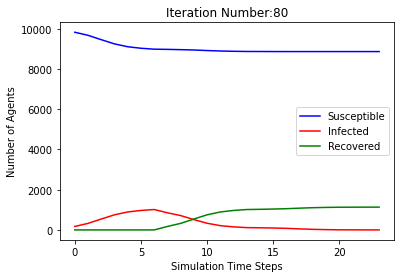

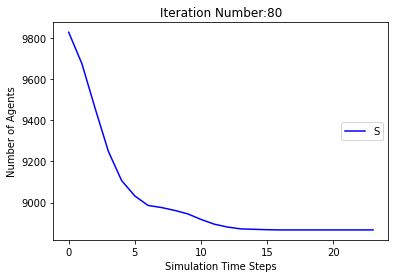

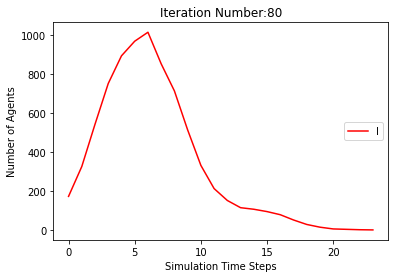

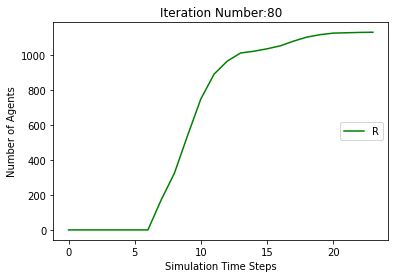

[9828, 9675, 9464, 9258, 9098, 9020, 8977, 8959, 8938, 8923, 8910, 8902, 8901, 8899, 8895, 8893, 8891, 8886, 8883, 8878, 8874, 8873, 8870, 8870, 8870, 8870, 8870, 8870, 8870, 8870]
[172, 325, 536, 742, 902, 980, 1023, 869, 737, 541, 348, 196, 119, 78, 64, 45, 32, 24, 19, 23, 25, 22, 23, 21, 16, 13, 8, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 325, 536, 742, 902, 980, 1023, 1041, 1062, 1077, 1090, 1098, 1099, 1101, 1105, 1107, 1109, 1114, 1117, 1122, 1126, 1127, 1130]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 

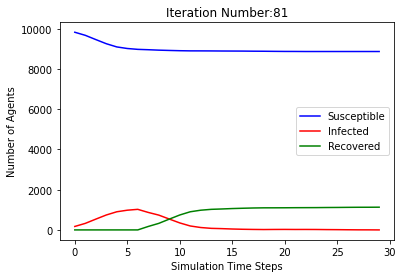

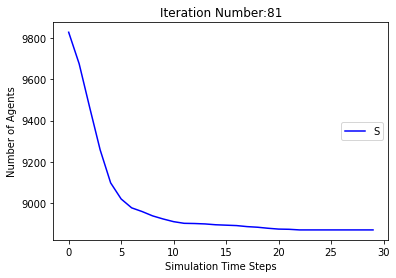

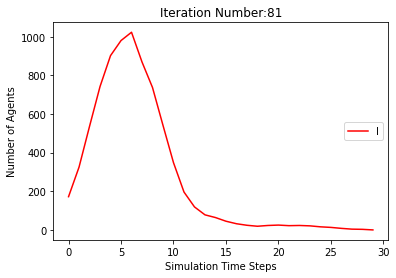

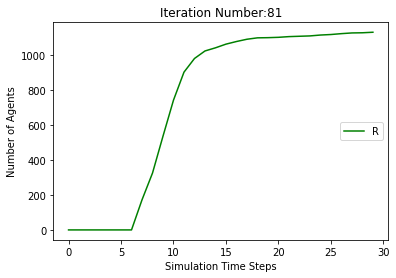

[9828, 9662, 9444, 9239, 9085, 9011, 8975, 8959, 8952, 8943, 8940, 8932, 8928, 8920, 8915, 8915, 8914, 8914, 8914, 8914, 8914, 8914, 8914, 8914]
[172, 338, 556, 761, 915, 989, 1025, 869, 710, 501, 299, 153, 83, 55, 44, 37, 29, 26, 18, 14, 6, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 338, 556, 761, 915, 989, 1025, 1041, 1048, 1057, 1060, 1068, 1072, 1080, 1085, 1085, 1086]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8

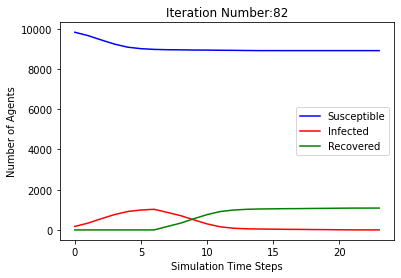

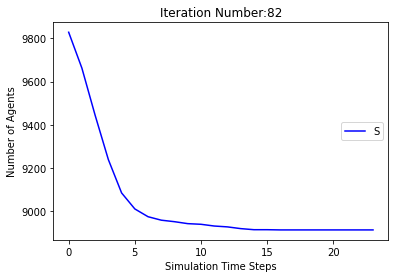

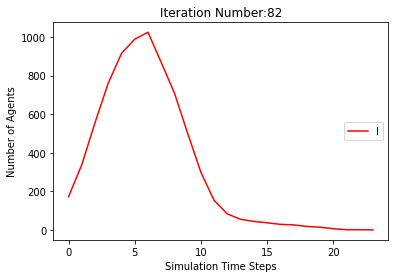

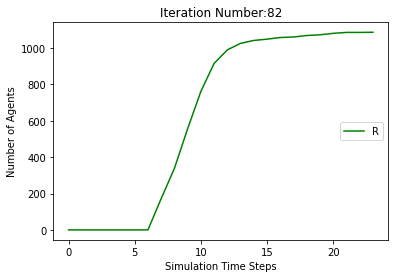

[9828, 9649, 9437, 9234, 9095, 9017, 8971, 8947, 8935, 8921, 8909, 8898, 8894, 8891, 8891, 8890, 8889, 8888, 8884, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883]
[172, 351, 563, 766, 905, 983, 1029, 881, 714, 516, 325, 197, 123, 80, 56, 45, 32, 21, 14, 11, 8, 8, 7, 6, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 351, 563, 766, 905, 983, 1029, 1053, 1065, 1079, 1091, 1102, 1106, 1109, 1109, 1110, 1111, 1112, 1116, 1117]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

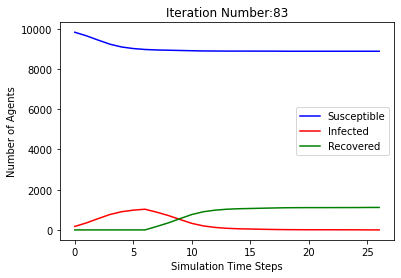

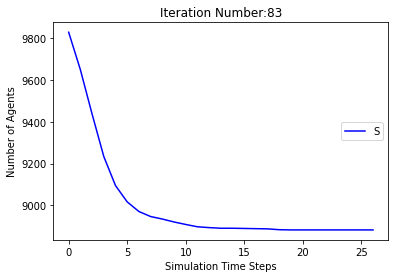

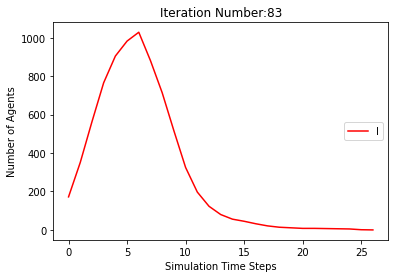

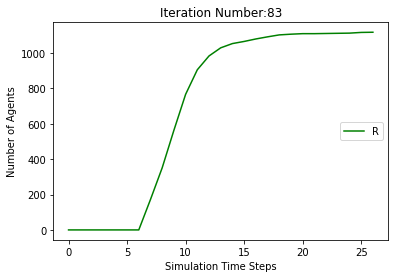

[9828, 9661, 9429, 9226, 9085, 9010, 8983, 8968, 8962, 8954, 8940, 8929, 8923, 8917, 8915, 8911, 8911, 8911, 8911, 8911, 8911, 8911, 8911]
[172, 339, 571, 774, 915, 990, 1017, 860, 699, 475, 286, 156, 87, 66, 53, 51, 43, 29, 18, 12, 6, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 339, 571, 774, 915, 990, 1017, 1032, 1038, 1046, 1060, 1071, 1077, 1083, 1085, 1089]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923

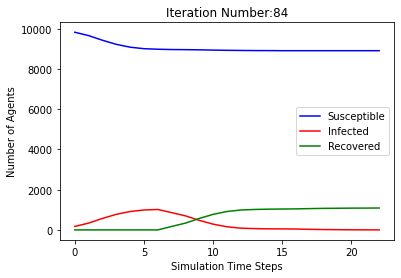

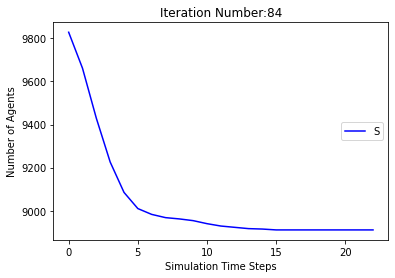

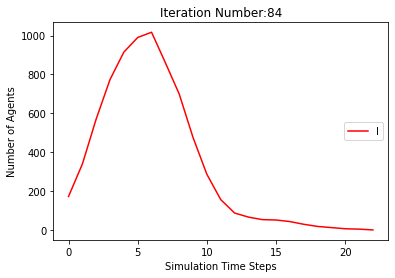

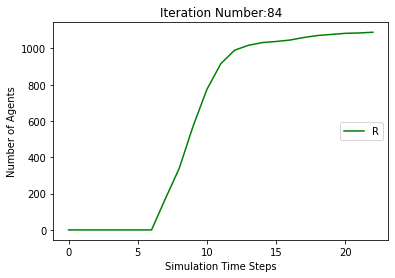

[9828, 9673, 9465, 9256, 9101, 9028, 9000, 8982, 8966, 8959, 8945, 8937, 8927, 8918, 8913, 8912, 8910, 8910, 8908, 8905, 8905, 8904, 8903, 8903, 8903, 8903, 8903, 8903, 8903, 8903]
[172, 327, 535, 744, 899, 972, 1000, 846, 707, 506, 311, 164, 101, 82, 69, 54, 49, 35, 29, 22, 13, 9, 9, 7, 7, 5, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 327, 535, 744, 899, 972, 1000, 1018, 1034, 1041, 1055, 1063, 1073, 1082, 1087, 1088, 1090, 1090, 1092, 1095, 1095, 1096, 1097]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254,

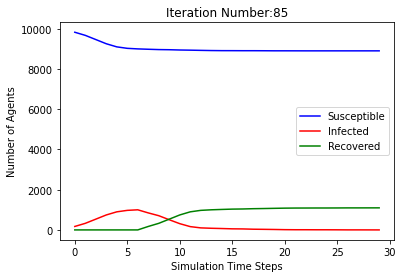

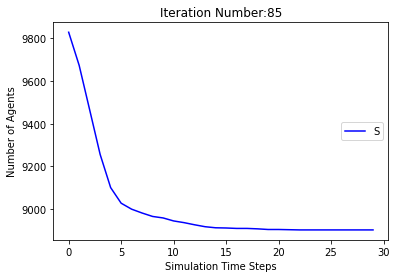

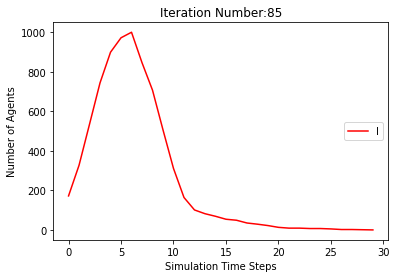

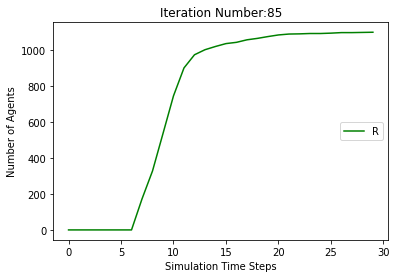

[9828, 9669, 9456, 9253, 9097, 9022, 8973, 8944, 8927, 8920, 8911, 8906, 8901, 8894, 8889, 8885, 8882, 8879, 8878, 8878, 8878, 8878, 8878, 8878, 8878, 8878]
[172, 331, 544, 747, 903, 978, 1027, 884, 742, 536, 342, 191, 121, 79, 55, 42, 38, 32, 28, 23, 16, 11, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 331, 544, 747, 903, 978, 1027, 1056, 1073, 1080, 1089, 1094, 1099, 1106, 1111, 1115, 1118, 1121, 1122]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934

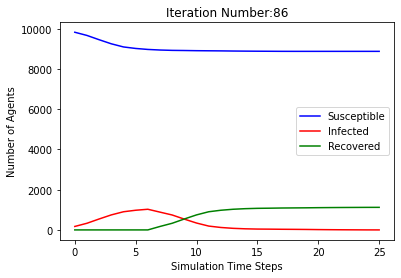

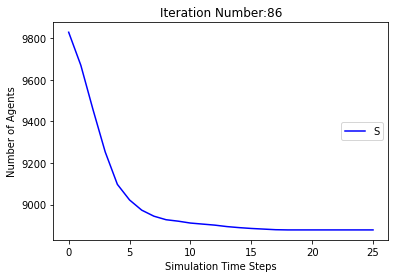

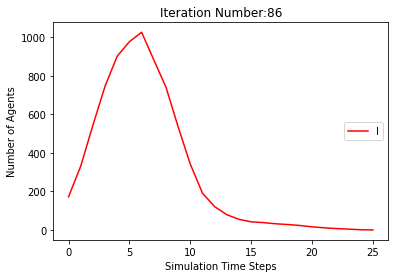

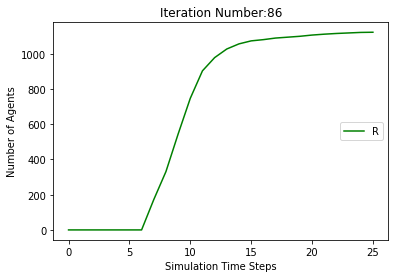

[9828, 9656, 9433, 9241, 9093, 9012, 8985, 8973, 8958, 8948, 8939, 8933, 8930, 8925, 8921, 8920, 8918, 8916, 8913, 8912, 8912, 8912, 8912, 8912, 8912, 8912, 8912]
[172, 344, 567, 759, 907, 988, 1015, 855, 698, 485, 302, 160, 82, 60, 52, 38, 30, 23, 20, 18, 13, 9, 8, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 344, 567, 759, 907, 988, 1015, 1027, 1042, 1052, 1061, 1067, 1070, 1075, 1079, 1080, 1082, 1084, 1087, 1088]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

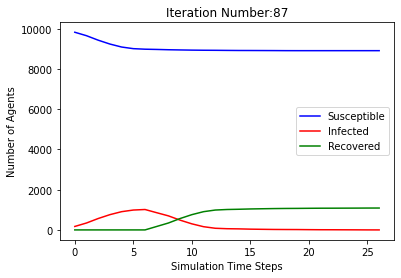

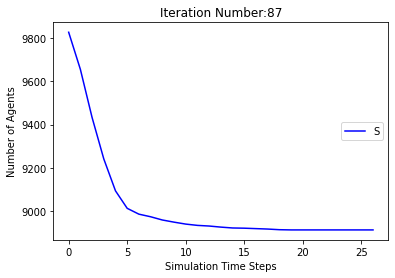

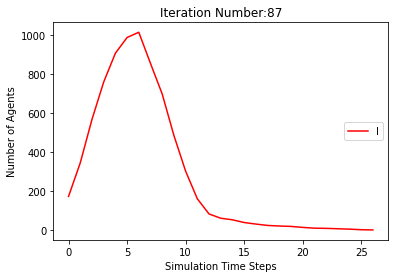

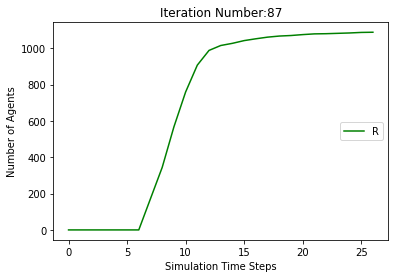

[9828, 9652, 9427, 9222, 9077, 9019, 8985, 8962, 8942, 8930, 8922, 8920, 8919, 8918, 8916, 8915, 8915, 8915, 8915, 8915, 8915, 8915, 8915]
[172, 348, 573, 778, 923, 981, 1015, 866, 710, 497, 300, 157, 100, 67, 46, 27, 15, 7, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 348, 573, 778, 923, 981, 1015, 1038, 1058, 1070, 1078, 1080, 1081, 1082, 1084, 1085]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 

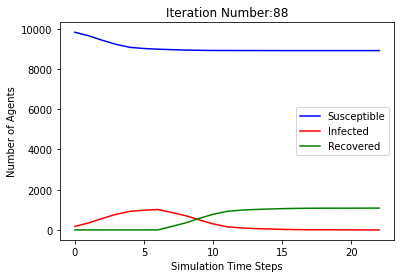

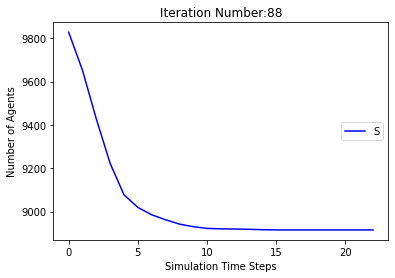

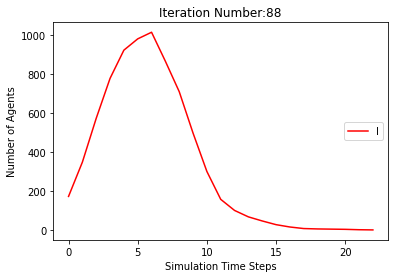

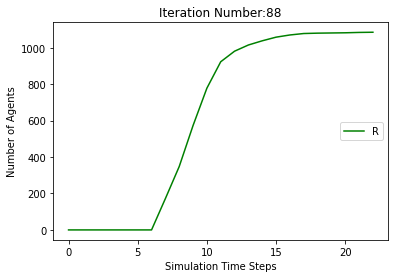

[9828, 9653, 9438, 9247, 9117, 9027, 8987, 8962, 8941, 8928, 8922, 8909, 8906, 8902, 8899, 8894, 8892, 8891, 8890, 8889, 8886, 8884, 8882, 8882, 8882, 8882, 8882, 8882, 8882, 8882]
[172, 347, 562, 753, 883, 973, 1013, 866, 712, 510, 325, 208, 121, 85, 63, 47, 36, 31, 19, 17, 16, 15, 12, 10, 9, 8, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 347, 562, 753, 883, 973, 1013, 1038, 1059, 1072, 1078, 1091, 1094, 1098, 1101, 1106, 1108, 1109, 1110, 1111, 1114, 1116, 1118]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 92

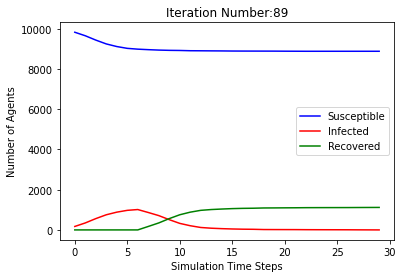

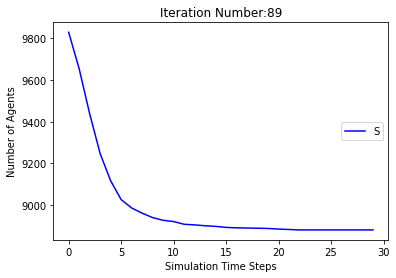

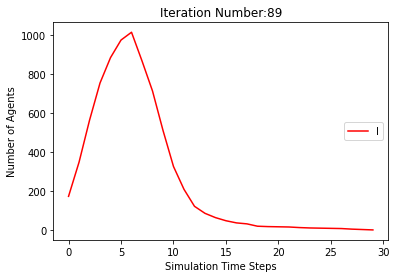

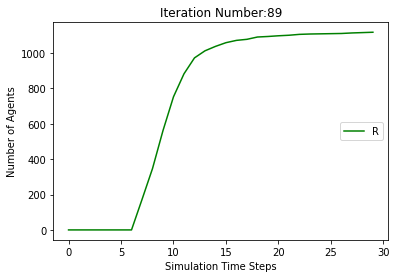

[9828, 9643, 9421, 9205, 9064, 9005, 8976, 8961, 8954, 8945, 8939, 8933, 8926, 8920, 8918, 8915, 8912, 8912, 8912, 8912, 8912, 8912, 8912, 8912]
[172, 357, 579, 795, 936, 995, 1024, 867, 689, 476, 266, 131, 79, 56, 43, 39, 33, 27, 21, 14, 8, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 357, 579, 795, 936, 995, 1024, 1039, 1046, 1055, 1061, 1067, 1074, 1080, 1082, 1085, 1088]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8

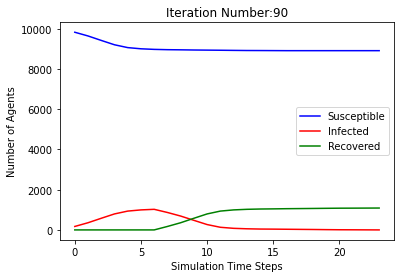

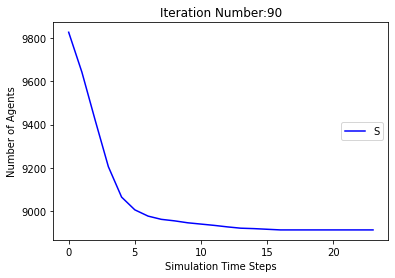

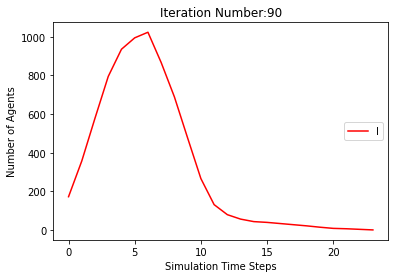

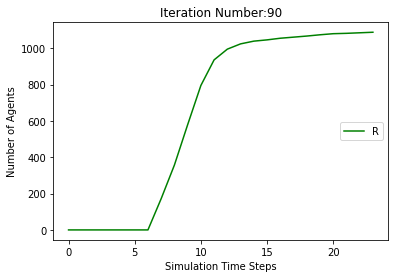

[9828, 9666, 9437, 9213, 9075, 9007, 8971, 8953, 8949, 8944, 8939, 8937, 8935, 8929, 8923, 8921, 8920, 8920, 8920, 8920, 8920, 8920, 8920, 8920]
[172, 334, 563, 787, 925, 993, 1029, 875, 717, 493, 274, 138, 72, 42, 30, 28, 24, 19, 17, 15, 9, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 334, 563, 787, 925, 993, 1029, 1047, 1051, 1056, 1061, 1063, 1065, 1071, 1077, 1079, 1080]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8

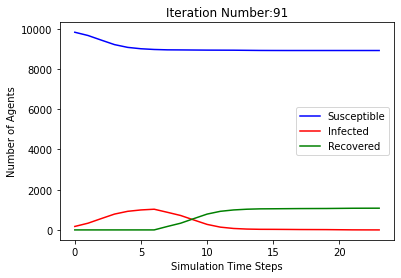

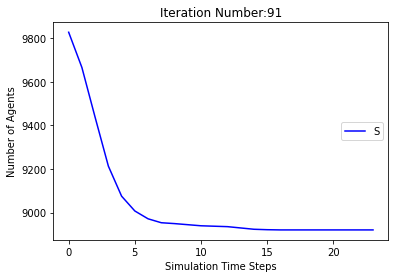

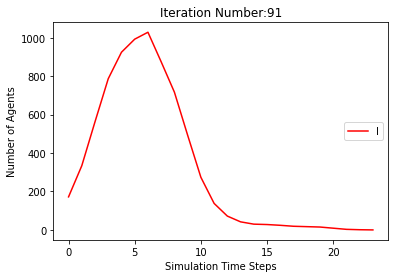

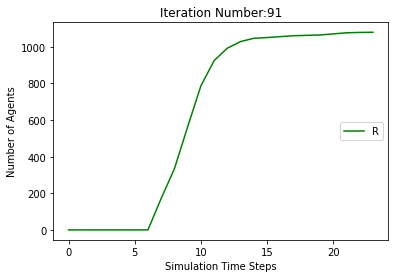

[9828, 9670, 9465, 9240, 9091, 9025, 8997, 8978, 8967, 8959, 8949, 8941, 8934, 8930, 8925, 8922, 8921, 8920, 8918, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[172, 330, 535, 760, 909, 975, 1003, 850, 703, 506, 291, 150, 91, 67, 53, 45, 38, 29, 23, 18, 14, 9, 6, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 330, 535, 760, 909, 975, 1003, 1022, 1033, 1041, 1051, 1059, 1066, 1070, 1075, 1078, 1079, 1080, 1082, 1084]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 895

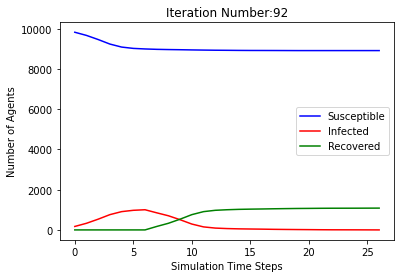

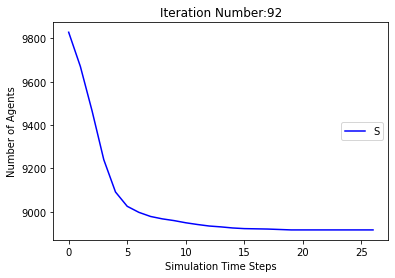

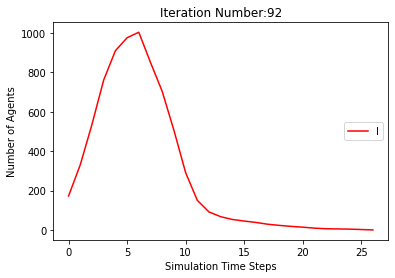

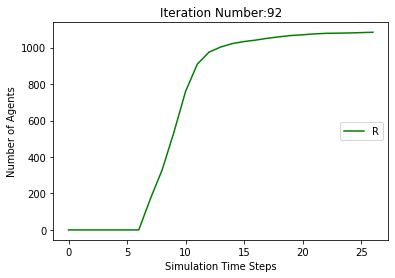

[9828, 9653, 9442, 9233, 9086, 9028, 8990, 8975, 8956, 8945, 8931, 8921, 8914, 8908, 8905, 8905, 8905, 8905, 8905, 8905, 8905, 8905]
[172, 347, 558, 767, 914, 972, 1010, 853, 697, 497, 302, 165, 114, 82, 70, 51, 40, 26, 16, 9, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 347, 558, 767, 914, 972, 1010, 1025, 1044, 1055, 1069, 1079, 1086, 1092, 1095]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], 

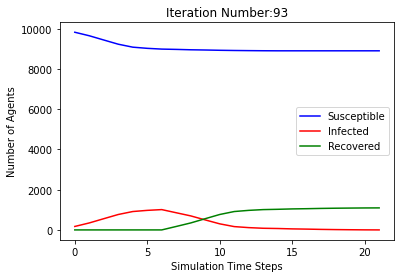

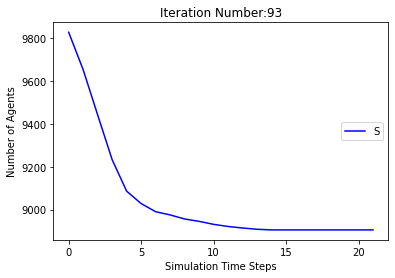

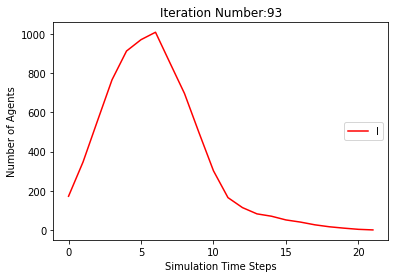

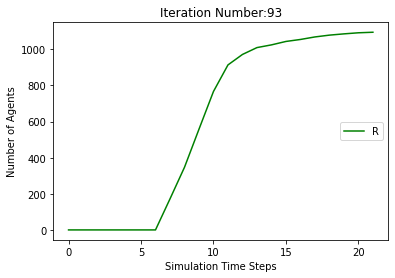

[9828, 9664, 9458, 9262, 9112, 9031, 8983, 8962, 8946, 8938, 8930, 8923, 8917, 8910, 8906, 8904, 8903, 8903, 8903, 8903, 8903, 8903, 8903, 8903]
[172, 336, 542, 738, 888, 969, 1017, 866, 718, 520, 332, 189, 114, 73, 56, 42, 35, 27, 20, 14, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 336, 542, 738, 888, 969, 1017, 1038, 1054, 1062, 1070, 1077, 1083, 1090, 1094, 1096, 1097]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

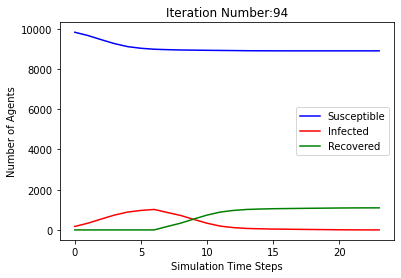

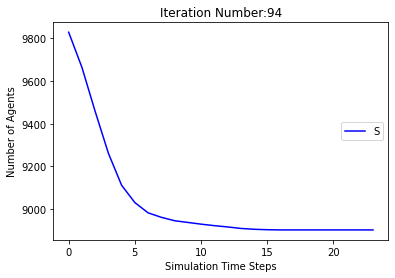

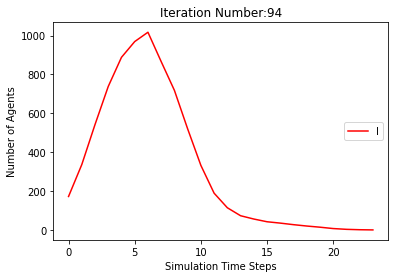

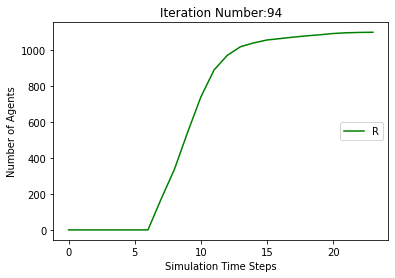

[9828, 9669, 9452, 9248, 9118, 9044, 8995, 8971, 8956, 8940, 8930, 8922, 8915, 8911, 8909, 8903, 8902, 8902, 8902, 8902, 8902, 8902, 8902, 8902]
[172, 331, 548, 752, 882, 956, 1005, 857, 713, 512, 318, 196, 129, 84, 62, 53, 38, 28, 20, 13, 9, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 331, 548, 752, 882, 956, 1005, 1029, 1044, 1060, 1070, 1078, 1085, 1089, 1091, 1097, 1098]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

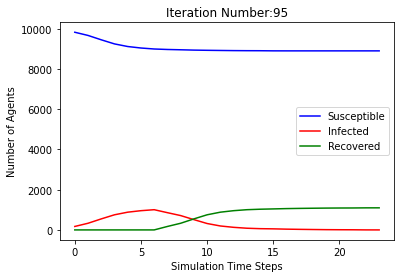

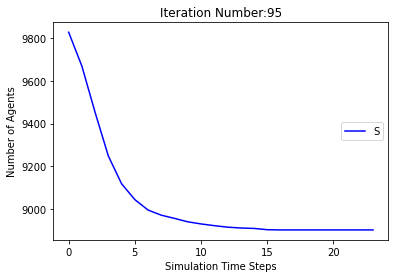

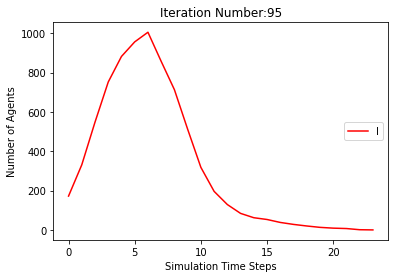

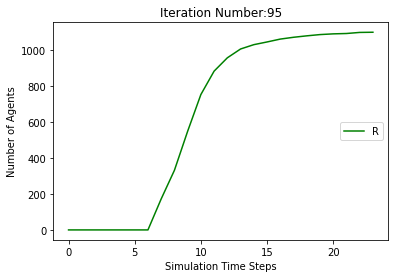

[9828, 9659, 9434, 9224, 9104, 9027, 8992, 8970, 8953, 8934, 8919, 8909, 8901, 8896, 8891, 8891, 8888, 8888, 8888, 8888, 8888, 8888, 8888, 8888]
[172, 341, 566, 776, 896, 973, 1008, 858, 706, 500, 305, 195, 126, 96, 79, 62, 46, 31, 21, 13, 8, 3, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 341, 566, 776, 896, 973, 1008, 1030, 1047, 1066, 1081, 1091, 1099, 1104, 1109, 1109, 1112]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 

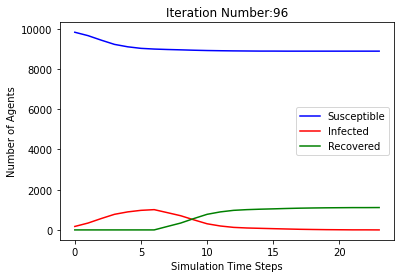

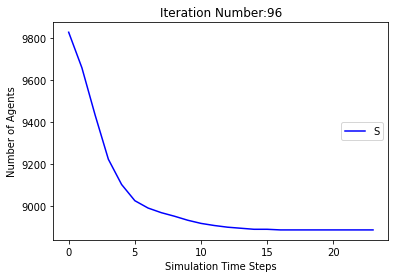

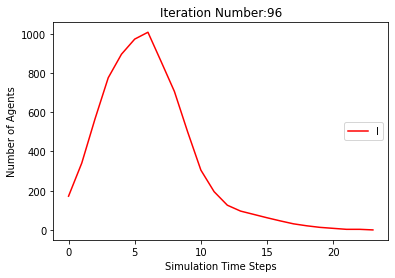

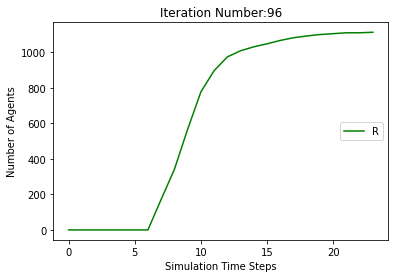

[9828, 9679, 9468, 9273, 9137, 9053, 9002, 8978, 8969, 8958, 8953, 8947, 8941, 8935, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[172, 321, 532, 727, 863, 947, 998, 850, 710, 510, 320, 190, 112, 67, 49, 40, 29, 24, 18, 12, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 321, 532, 727, 863, 947, 998, 1022, 1031, 1042, 1047, 1053, 1059, 1065, 1071]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923], [

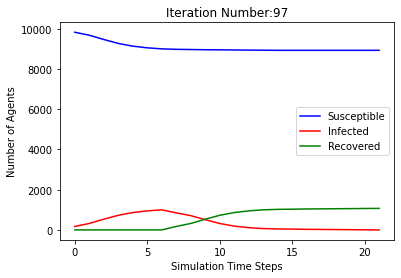

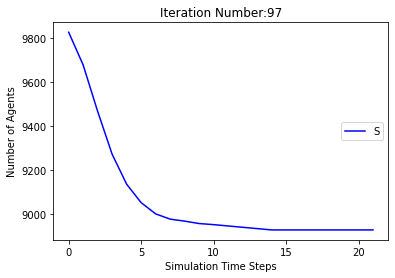

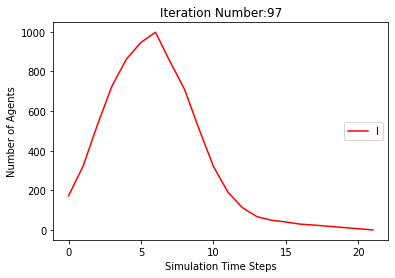

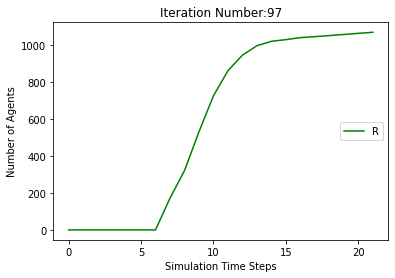

[9828, 9678, 9442, 9230, 9091, 9018, 8982, 8958, 8942, 8923, 8907, 8900, 8895, 8889, 8886, 8881, 8881, 8881, 8881, 8881, 8881, 8881, 8881]
[172, 322, 558, 770, 909, 982, 1018, 870, 736, 519, 323, 191, 123, 93, 72, 61, 42, 26, 19, 14, 8, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 322, 558, 770, 909, 982, 1018, 1042, 1058, 1077, 1093, 1100, 1105, 1111, 1114, 1119]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8999, 8993, 8981, 8970, 8956, 8952, 8942, 8934, 8925, 8924, 8923, 8923, 8923, 8923, 8923, 892

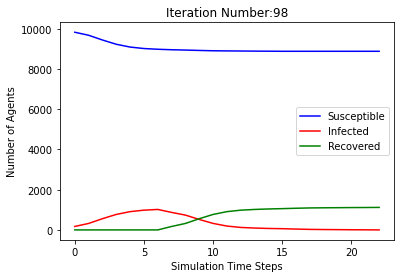

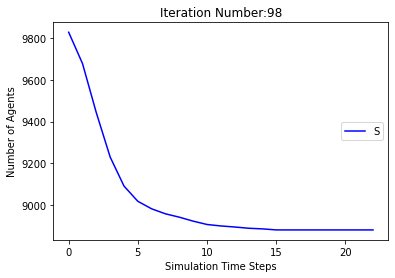

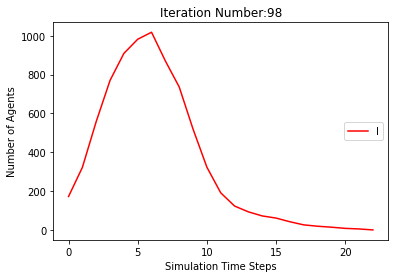

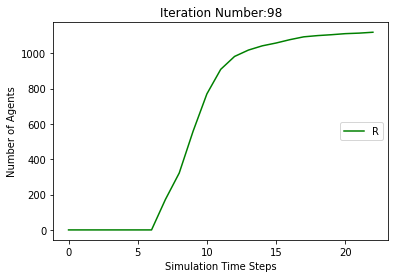

[9828, 9654, 9432, 9232, 9097, 9024, 8988, 8970, 8954, 8946, 8938, 8929, 8922, 8916, 8915, 8914, 8914, 8914, 8914, 8912, 8911, 8911, 8910, 8907, 8906, 8906, 8906, 8906, 8906, 8906, 8906, 8906]
[172, 346, 568, 768, 903, 976, 1012, 858, 700, 486, 294, 168, 102, 72, 55, 40, 32, 24, 15, 10, 5, 4, 4, 7, 8, 8, 6, 5, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 346, 568, 768, 903, 976, 1012, 1030, 1046, 1054, 1062, 1071, 1078, 1084, 1085, 1086, 1086, 1086, 1086, 1088, 1089, 1089, 1090, 1093, 1094]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 88

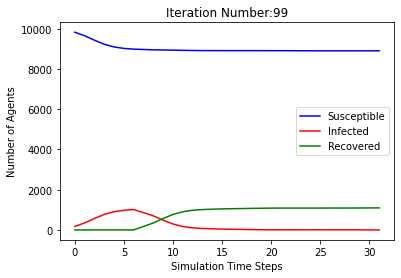

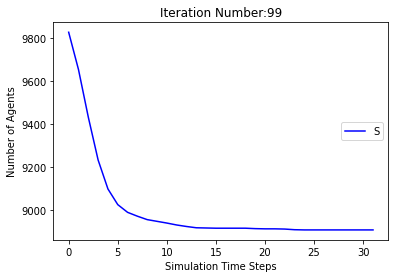

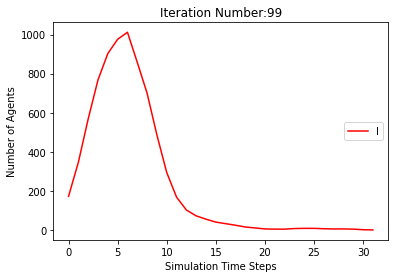

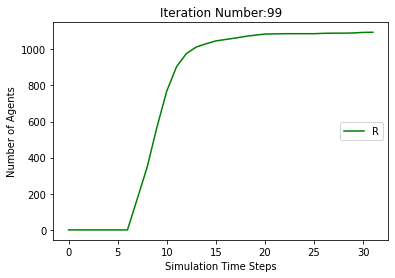

[9828, 9651, 9419, 9212, 9084, 8996, 8960, 8934, 8919, 8907, 8893, 8884, 8880, 8876, 8874, 8870, 8868, 8868, 8868, 8868, 8868, 8867, 8867, 8867, 8867, 8867, 8867, 8867, 8867]
[172, 349, 581, 788, 916, 1004, 1040, 894, 732, 512, 319, 200, 116, 84, 60, 49, 39, 25, 16, 12, 8, 7, 3, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 172, 349, 581, 788, 916, 1004, 1040, 1066, 1081, 1093, 1107, 1116, 1120, 1124, 1126, 1130, 1132, 1132, 1132, 1132, 1132, 1133]
[[], [9828, 9668, 9451, 9231, 9088, 9030, 9001, 8977, 8967, 8958, 8952, 8948, 8946, 8945, 8941, 8939, 8937, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935], [9828, 9652, 9431, 9231, 9087, 9009, 8991, 8973, 8960, 8945, 8926, 8916, 8903, 8895, 8889, 8886, 8886, 8886, 8885, 8885, 8885, 8885, 8885, 8885, 8885, 8885], [9828, 9673, 9466, 9253, 9104, 9007, 8977, 8953, 8939, 8933, 8925, 8914, 8908, 8902, 8899, 8899, 8897, 8894, 8893, 8893, 8893, 8892, 8890, 8888, 8885, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883], [9828, 9668, 9453, 9254, 9107, 9027, 8

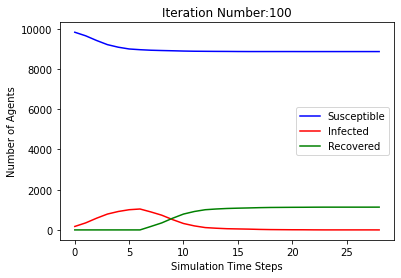

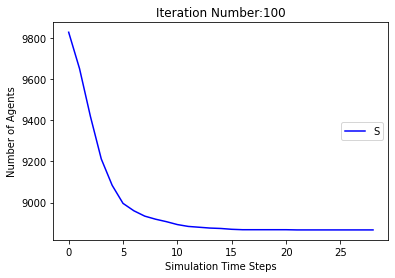

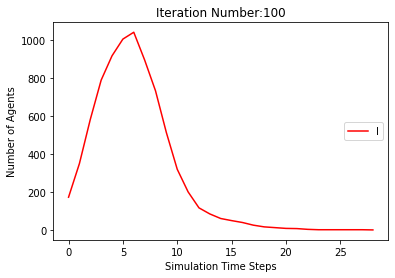

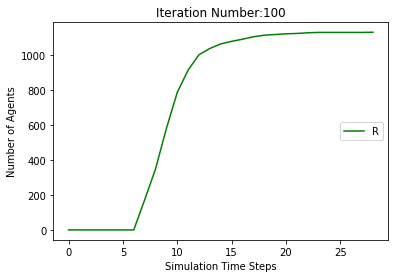

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

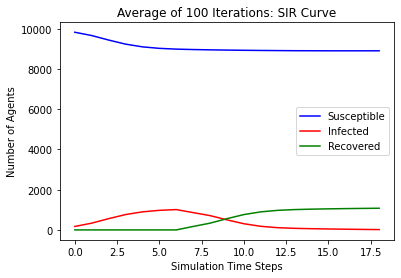

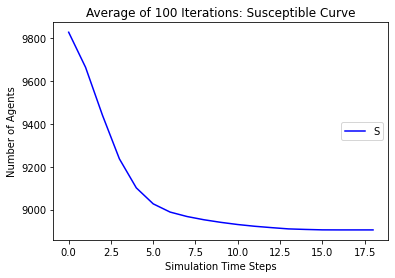

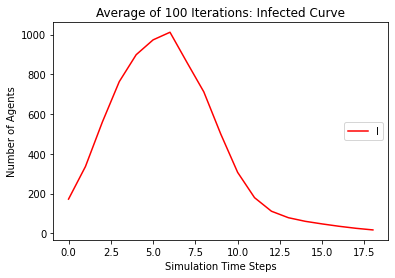

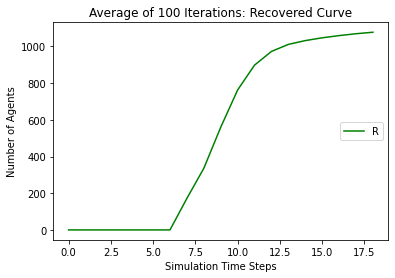

In [14]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
